<h1> DSCI 100 Project <\h1>

*Predicting news article popularity*
Group 28: Natsumi Tadakuma, Jackie Huang, Cindy Chen, Nikko Dumrique

### Introduction

In these days, lots of people read and share online news. Ren and Yang (2018) did a research on online news articles in order to predict the popularity of the news based on the article’s information and number of shares. According to their paper, it suggests the future exploration on the context of news article and necessity of more cleared data (Ren & Yang, 2018). Therefore, in this project, we aim to explore on the database: News Popularity Data Set from https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity, and through clearing the database, we will try to predict the popularity of the news articles. As the previous research states this data is noisy, we would pivot from that and chose data which had the "least noise", which estimated to have a strong correlation. For our predictive question, we set as “Can we predict the popularity (number of shares) by given variables of the data?”.

#### Methods

Referring the other project done by Rezaeenour, Yari, Hadavandi, and Roozbahani suggests the importance of which weekday the article published, and also the content of the articles (2018). Considering the previous researches, we clean the data 3 columns out of 61, which are about shared numbers, when the articles were published (Monday to Sunday), category of the articles (Lifestyle, Entertainment etc.), and also some our pick of variables which estimated to have a relationship to the shared number: rate of unique words, average length, and both best and worst keywords. Also, even the dataset’s primary concern is predicting popularity, there is no inherent categorical variable to measure it. Therefore, for our analysis we will define the popularity of a news article based on the number of shares it has. We have created 4 categories of which define a range of shares; Not popular, somewhat popular, popular, and viral. Using the 4 categories about popularity we defined, we separate the data and cut out outliers, and we use box plots and histogram to visualize.

#### Preliminary Exploratory data analysis

In [7]:
library(tidyr)
library(repr)
library(rsample)
library(GGally)
library(ggplot2)
library(tidyverse)
library(tidymodels)

Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.0

Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ tune      0.1.1 
✔ infer     0.5.4      ✔ 

The data we are trying to extract is in zip format. To extract the actual csv file from the web, we need to create a temporary file for the zip file, then unzip the file locally to read. On top of this, since the zip file also contains a .names file, we need to specify what we want to read when doing read_csv.

In [8]:
#download the zip file into a temporary file
temp <- tempfile()
temp_dir <- tempfile()
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip", temp, mode="wb")
OnlineNewsPopularity_unzipped <- unzip(temp, exdir = temp_dir)

#read the csv within the unzipped_contents
news <- OnlineNewsPopularity_unzipped[2] %>% #may be unzipped_contents[1] if you get an error
    read_csv()
head(news)
unlink(c(temp, temp_dir))

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


## Wrangle and clean
Creating a categorical variable to represent the popularity (shares) so it help us better visualize the data. The dividing criteria comes from the summary of the shares

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     946    1400    3395    2800  843300 

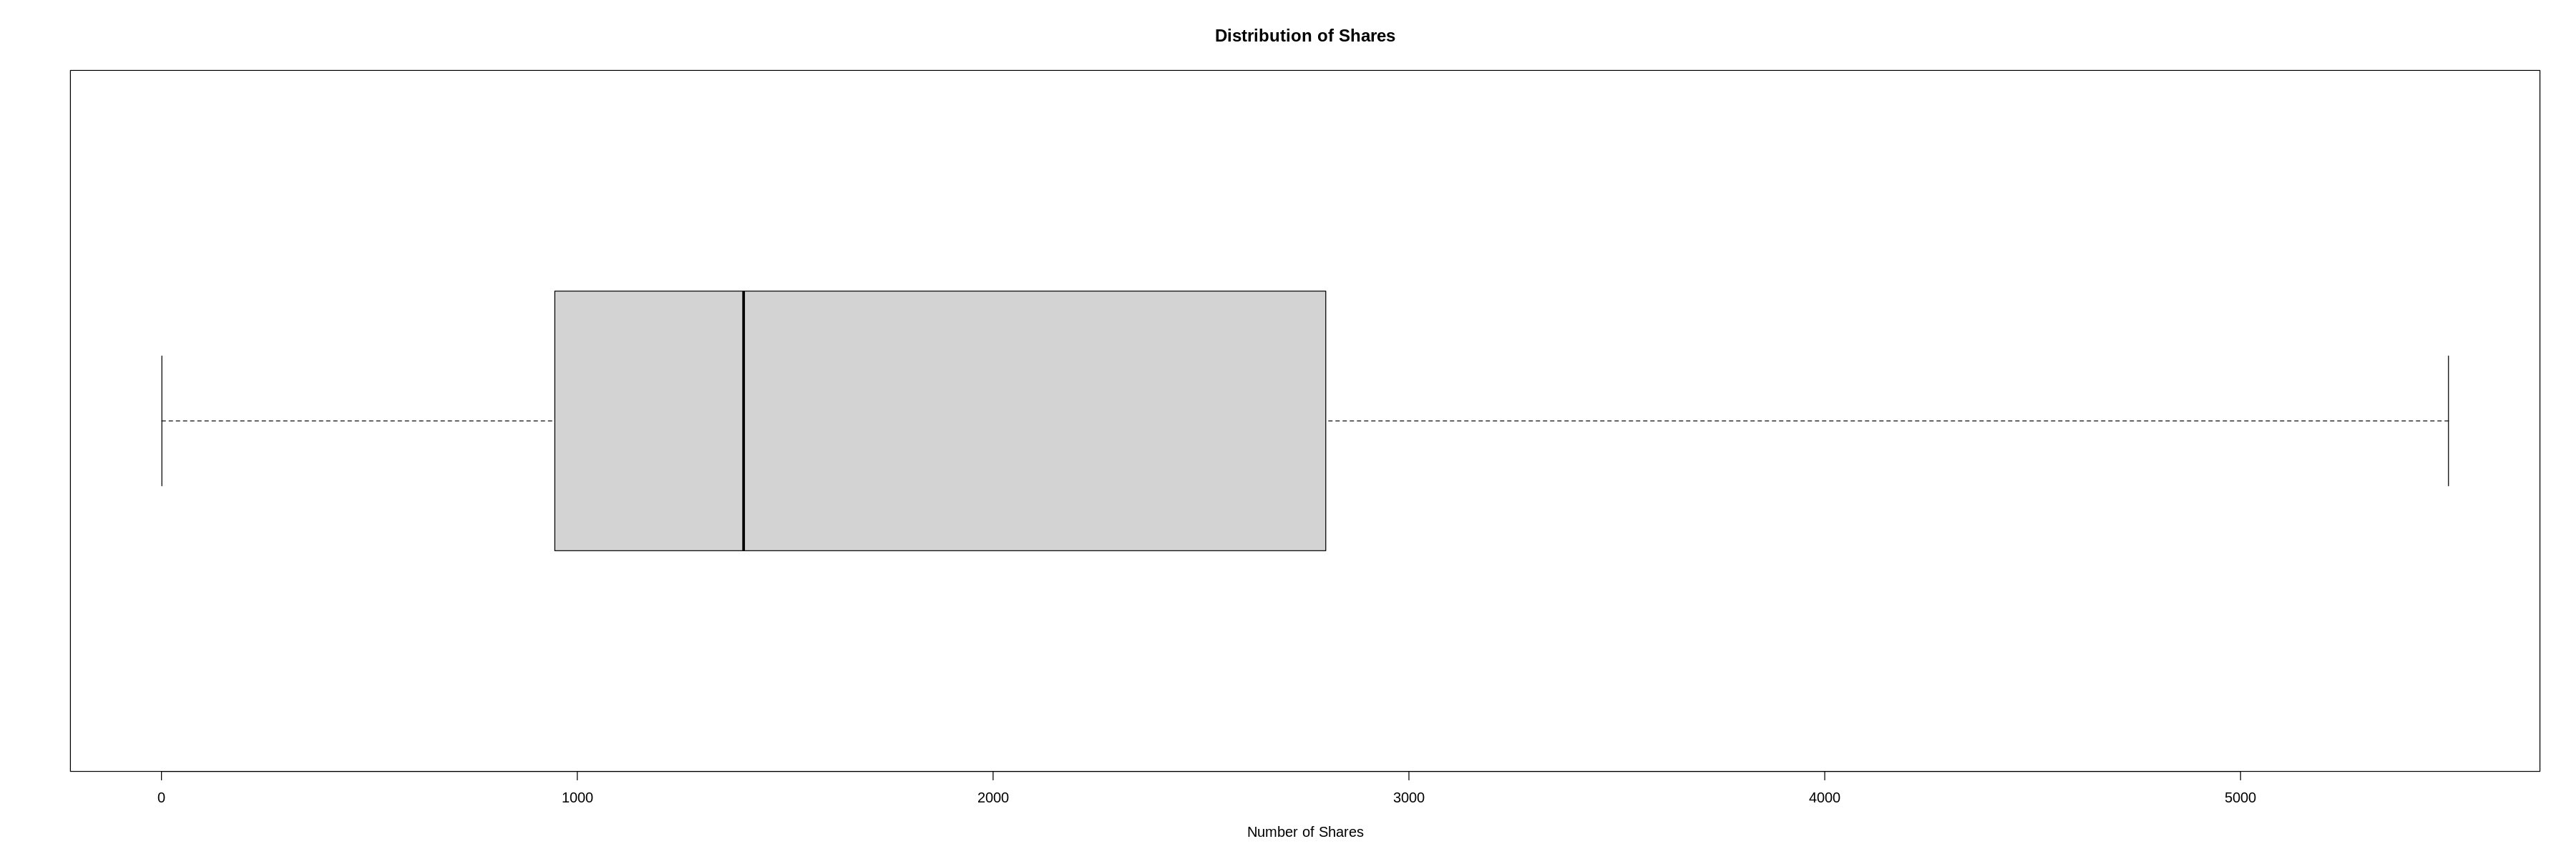

In [9]:
#To get a sense of the virality we have provided a summary and boxplot of the variable we are trying to predict i.e shares.
options(repr.plot.width = 30, repr.plot.height = 10)
summary(news$shares)
boxplot(news$shares, outline = FALSE, horizontal = TRUE)
title(main = "Distribution of Shares", xlab = "Number of Shares")

summary on the number of shares:

In [10]:
#We will create a new variable that is the class labels of each observation
news = news %>% 
      mutate(popularity = ifelse(shares < 500, "Not_Popular",
                          ifelse(shares %in% 500:1399, "Somewhat_Popular",
                          ifelse(shares %in% 1400:3299, "Popular", "Viral")))) %>% 
      mutate(popularity = as.factor(popularity))
head(news)

url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593,Somewhat_Popular
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711,Somewhat_Popular
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500,Popular
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200,Somewhat_Popular
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505,Somewhat_Popular
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855,Somewhat_Popular


In [11]:
# combining the weekdays and data channels into one column
# We set all 0 to NA here, because in the original data set, 0 is used to represent FALSE. 
# Therefore, to get rid of all FALSE values, we set them to NA so that in pivot_longer, 
# we can remove these unecessary data points using value_drop_na = TRUE
news[,14:19][news[,14:19] == 0] = NA
news = news %>% 
    pivot_longer(data_channel_is_lifestyle:data_channel_is_world,
                 names_to = "Channel",
                 names_prefix = "data_channel_is_",
                 values_to = "Value",
                 values_drop_na = TRUE) %>% 
  select(-Value)
# Same thing here, setting 0 values to NA to get rid of them
news[,32:38][news[32:38] == 0] = NA
news = news %>% 
    pivot_longer(weekday_is_monday:weekday_is_sunday,
                 names_to = "weekday",
                 names_prefix = "weekday_is_",
                 values_to = "value",
                 values_drop_na = TRUE) %>% 
  select(-value)
head(news$weekday, 21)

[1] "monday"    "tuesday"   "wednesday" "thursday"  "friday"    "saturday" 
 [7] "monday"    "tuesday"   "wednesday" "thursday"  "friday"    "saturday" 
[13] "monday"    "tuesday"   "wednesday" "thursday"  "friday"    "saturday" 
[19] "monday"    "tuesday"   "wednesday"

### Exploratory Data analysis

We have decided to split our dataset using an 80:20 ratio. This is based of Paretos principle that states that 80% of consequences come from 20% of the causes. 

In [12]:
#This is the initial split to create our test and training datasets. 
#We have chosen 80:20 proportion based on the Pareto Principle.
splitted_data <- initial_split(news, prop = 0.80, strata = popularity)  
training_set <- training(splitted_data)   
testing_set <- testing(splitted_data)
# training_set
# testing_set
# https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio

In [13]:
## To filter out only quantitative varibles
news_numerical = unlist(lapply(training_set, is.numeric)) 
news_numerical = training_set[ , news_numerical]
cor(news_numerical) %>%
  as_data_frame(rownames = "var1") %>%
    pivot_longer(cols = -var1, names_to = "var2", values_to = "coeff") %>%
    filter(var1 == "shares") %>% 
    filter(var1 != var2) %>%
    arrange(desc(abs(coeff)))
## Code reference:
## https://stackoverflow.com/questions/48123611/using-ggpairs-on-a-large-dataset-with-many-variables

Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


var1,var2,coeff
<chr>,<chr>,<dbl>
shares,kw_avg_avg,0.1046593438
shares,kw_max_avg,0.0694304721
shares,self_reference_avg_sharess,0.0669243552
shares,self_reference_min_shares,0.0637178954
shares,self_reference_max_shares,0.0534753767
shares,kw_avg_min,0.0475903379
shares,kw_max_min,0.0472553280
shares,num_hrefs,0.0406081140
shares,global_subjectivity,0.0365819747


Based on the above, we choose kw_avg_avg, self_reference_avg_sharess, and num_hrefs.
That is, the Average keyword (avg. shares), the Avg. shares of referenced articles in Mashable, and the Number of links as they have the highest correlation with shares.



By filtering out the missing values, we successfully increased the correlation for 0.001 for the self_reference_avg_sharess predictor. That is evidence of something worked

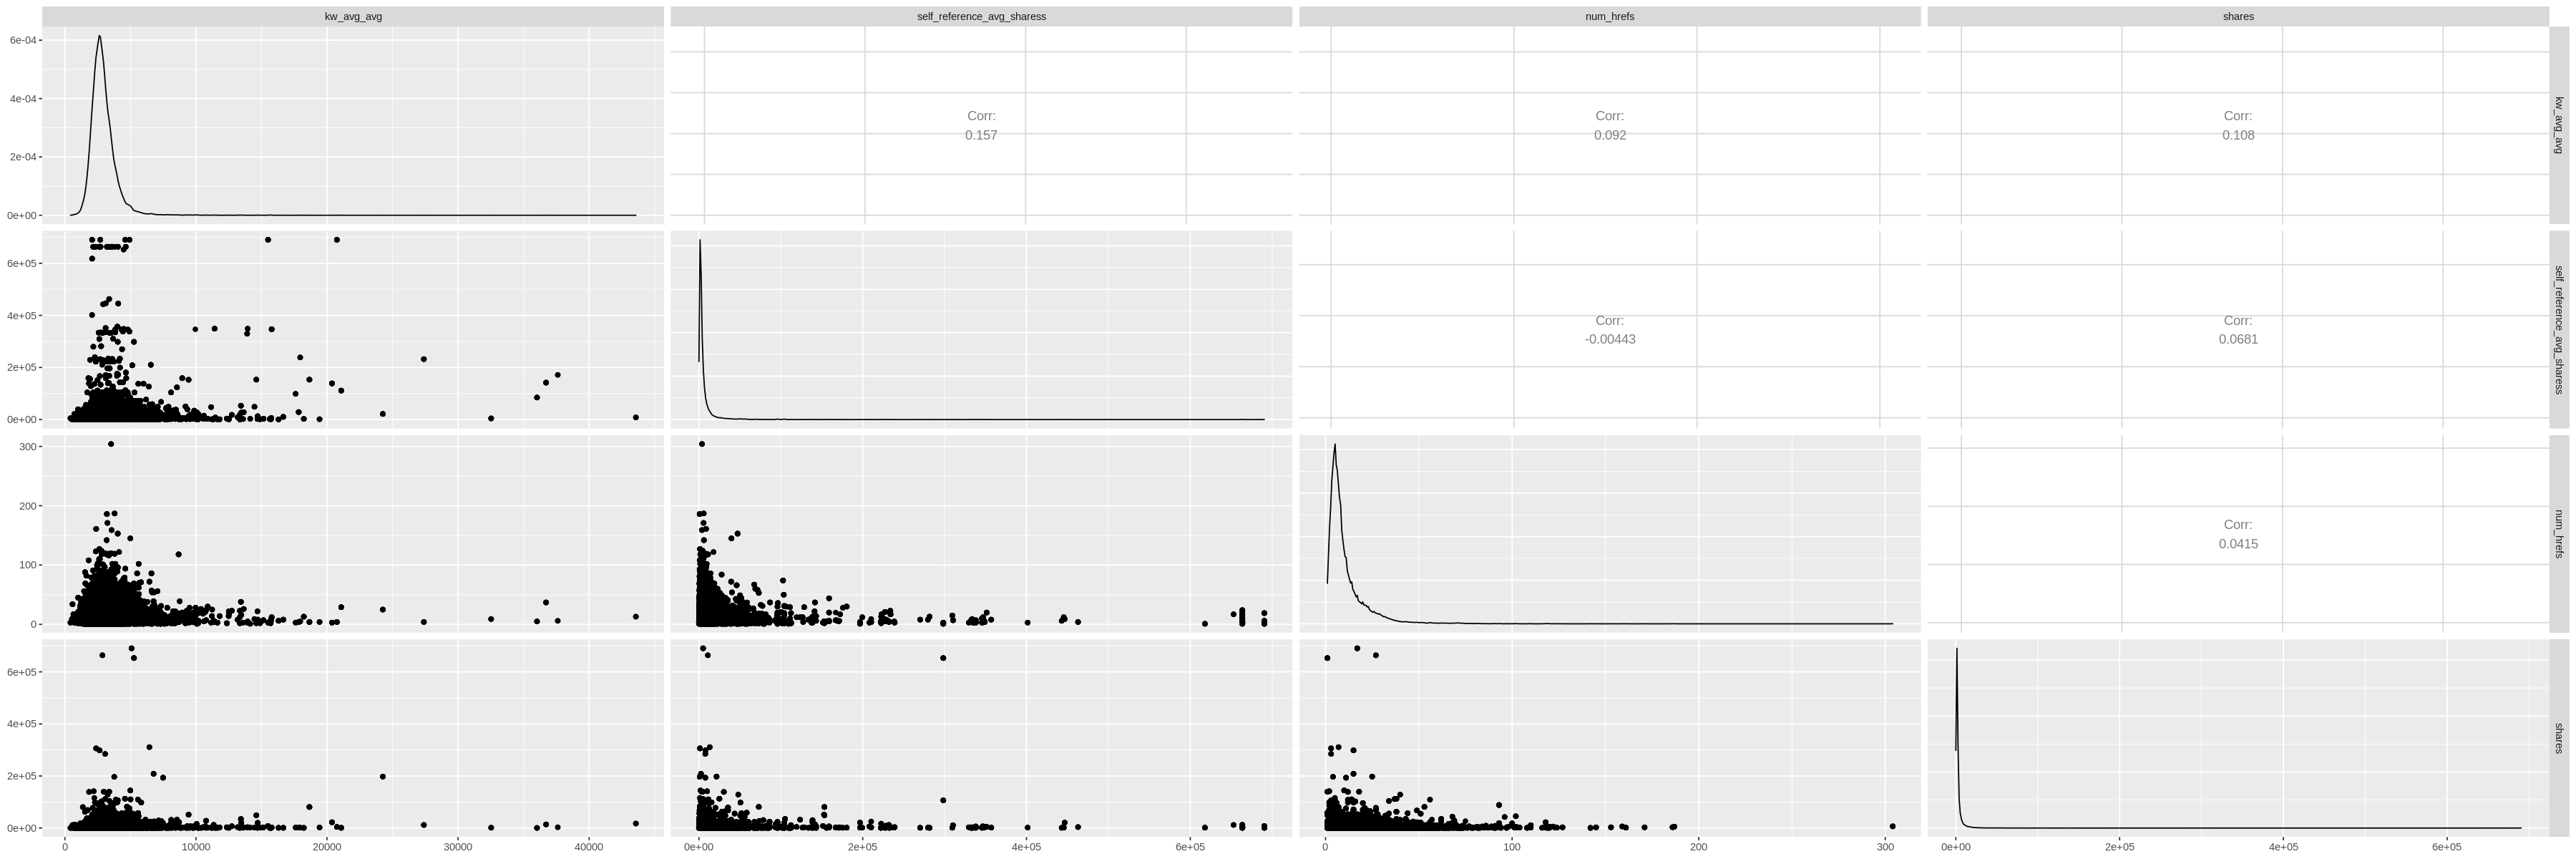

In [14]:
training_set %>% select(kw_avg_avg, self_reference_avg_sharess, num_hrefs, shares) %>% 
                  filter(kw_avg_avg != 0) %>% 
                  filter(self_reference_avg_sharess != 0) %>% 
                  filter(num_hrefs != 0) %>% 
                   ggpairs()

In [15]:
#From the predictors we have defined, we create a new dataset containing the predictors
tran_predictors = training_set %>% select(kw_avg_avg, self_reference_avg_sharess, 
                                          num_hrefs, shares, popularity)
head(tran_predictors)

kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares,popularity
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,496,4,593,Somewhat_Popular
0,496,4,593,Somewhat_Popular
0,496,4,593,Somewhat_Popular
0,496,4,593,Somewhat_Popular
0,496,4,593,Somewhat_Popular
0,0,3,711,Somewhat_Popular


Observing the dataset, we notice that some obervations have 0 as an value, we treat them as missing values as 0 will not do any good to our predictions. So we further process our training data

In [16]:
#filtering out the observations with zeros as their cell value.
tran_predictors = tran_predictors %>% 
                  filter(kw_avg_avg != 0) %>% 
                  filter(self_reference_avg_sharess != 0) %>% 
                  filter(num_hrefs != 0)
head(tran_predictors)

kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares,popularity
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
804.3803,3100,5,755,Somewhat_Popular
804.3803,3100,5,755,Somewhat_Popular
804.3803,3100,5,755,Somewhat_Popular
804.3803,3100,5,755,Somewhat_Popular
804.3803,3100,5,755,Somewhat_Popular
1184.5600,727,4,4600,Viral


We noticed that there are duplicated rows in the tran_predictors, so we want to remove them her. The duplication is probabily caused by some categorical variables that is not selected in train_predictors

In [17]:
#remove duplicate obvservations in our training set
tran_predictors = tran_predictors %>% distinct()
head(tran_predictors)

kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares,popularity
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
804.3803,3100.000,5,755,Somewhat_Popular
1184.5600,727.000,4,4600,Viral
1114.0240,951.000,5,1300,Somewhat_Popular
884.8520,1300.000,14,1200,Somewhat_Popular
1539.4172,3151.158,20,1500,Popular
713.9192,20900.000,3,1700,Popular


   kw_avg_avg      self_reference_avg_sharess   num_hrefs          shares      
 Min.   :  424.3   Min.   :     1.6           Min.   :  1.00   Min.   :     1  
 1st Qu.: 2346.6   1st Qu.:  1500.0           1st Qu.:  5.00   1st Qu.:   940  
 Median : 2766.1   Median :  2700.0           Median :  7.00   Median :  1400  
 Mean   : 2927.3   Mean   :  7114.7           Mean   : 10.75   Mean   :  2997  
 3rd Qu.: 3297.1   3rd Qu.:  5600.0           3rd Qu.: 13.00   3rd Qu.:  2600  
 Max.   :43567.7   Max.   :690400.0           Max.   :304.00   Max.   :690400  

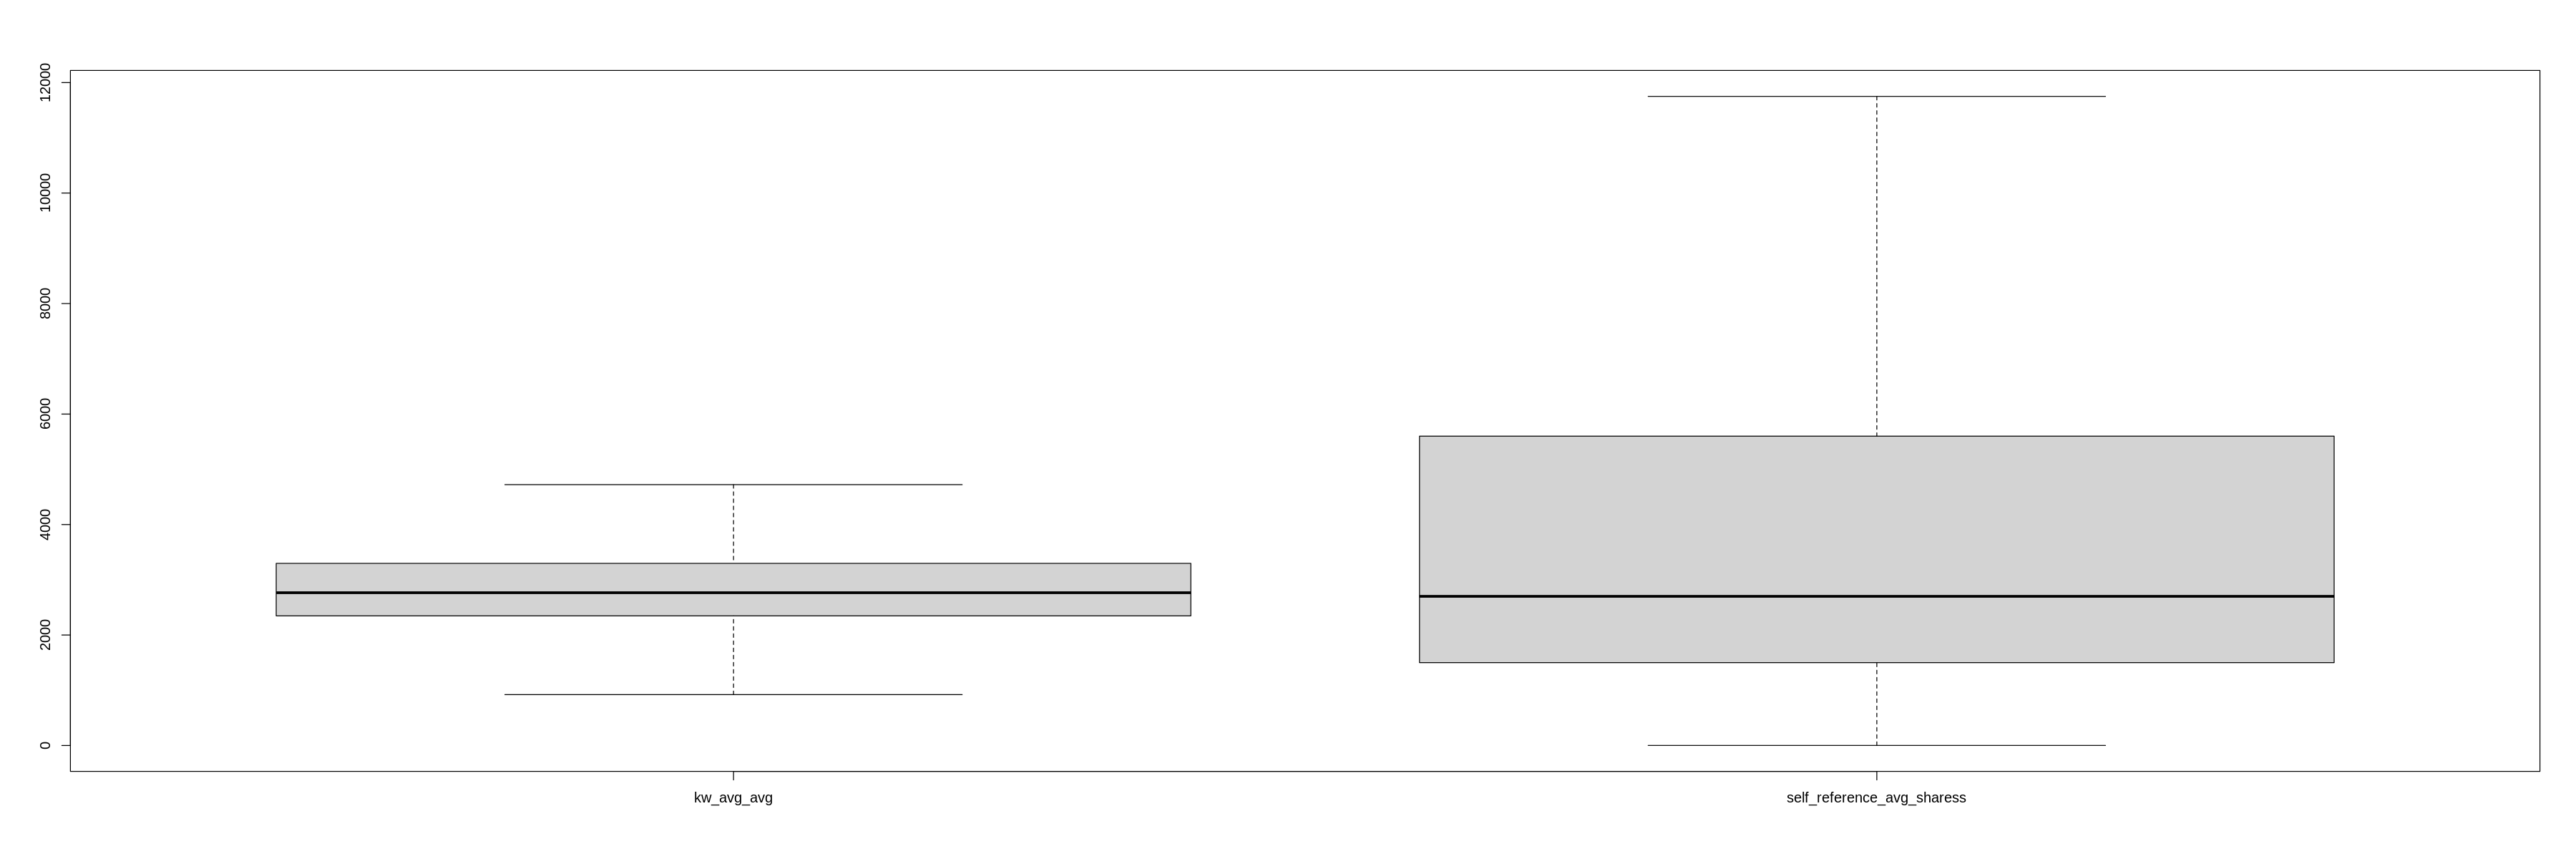

In [18]:
# we now present a summary of the tran_predictors. 
# Since one of our predictors has a significantly different scale than the others (predictor num_hrefs)
# we have displayed that predictor's boxplot on a seperate graph
summary(tran_predictors %>% select(-popularity))
boxplot(tran_predictors %>% select(-popularity, -shares, -num_hrefs), outline = FALSE)

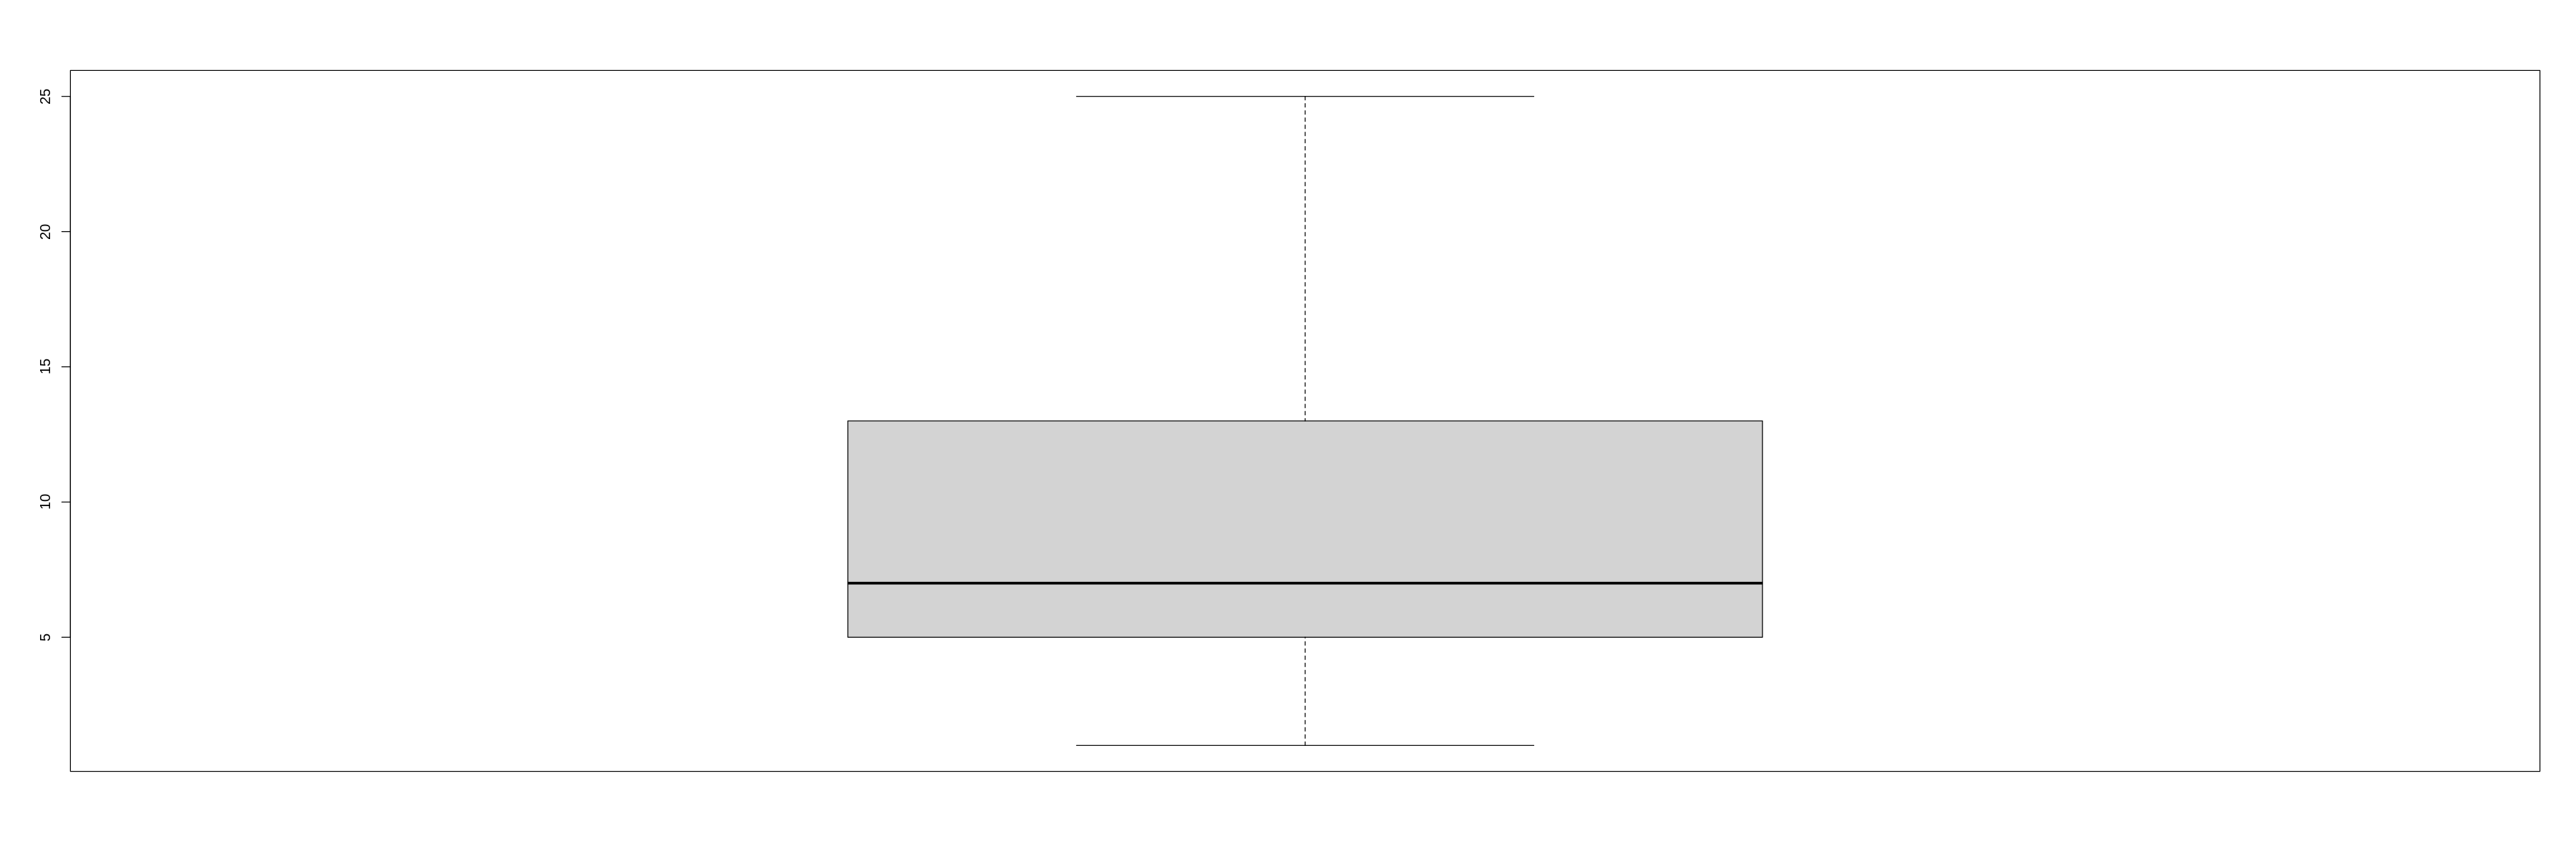

In [19]:
# The boxplot of predictor, num_hrefs
boxplot(tran_predictors$num_hrefs, outline = FALSE)

### Visualize Explorary

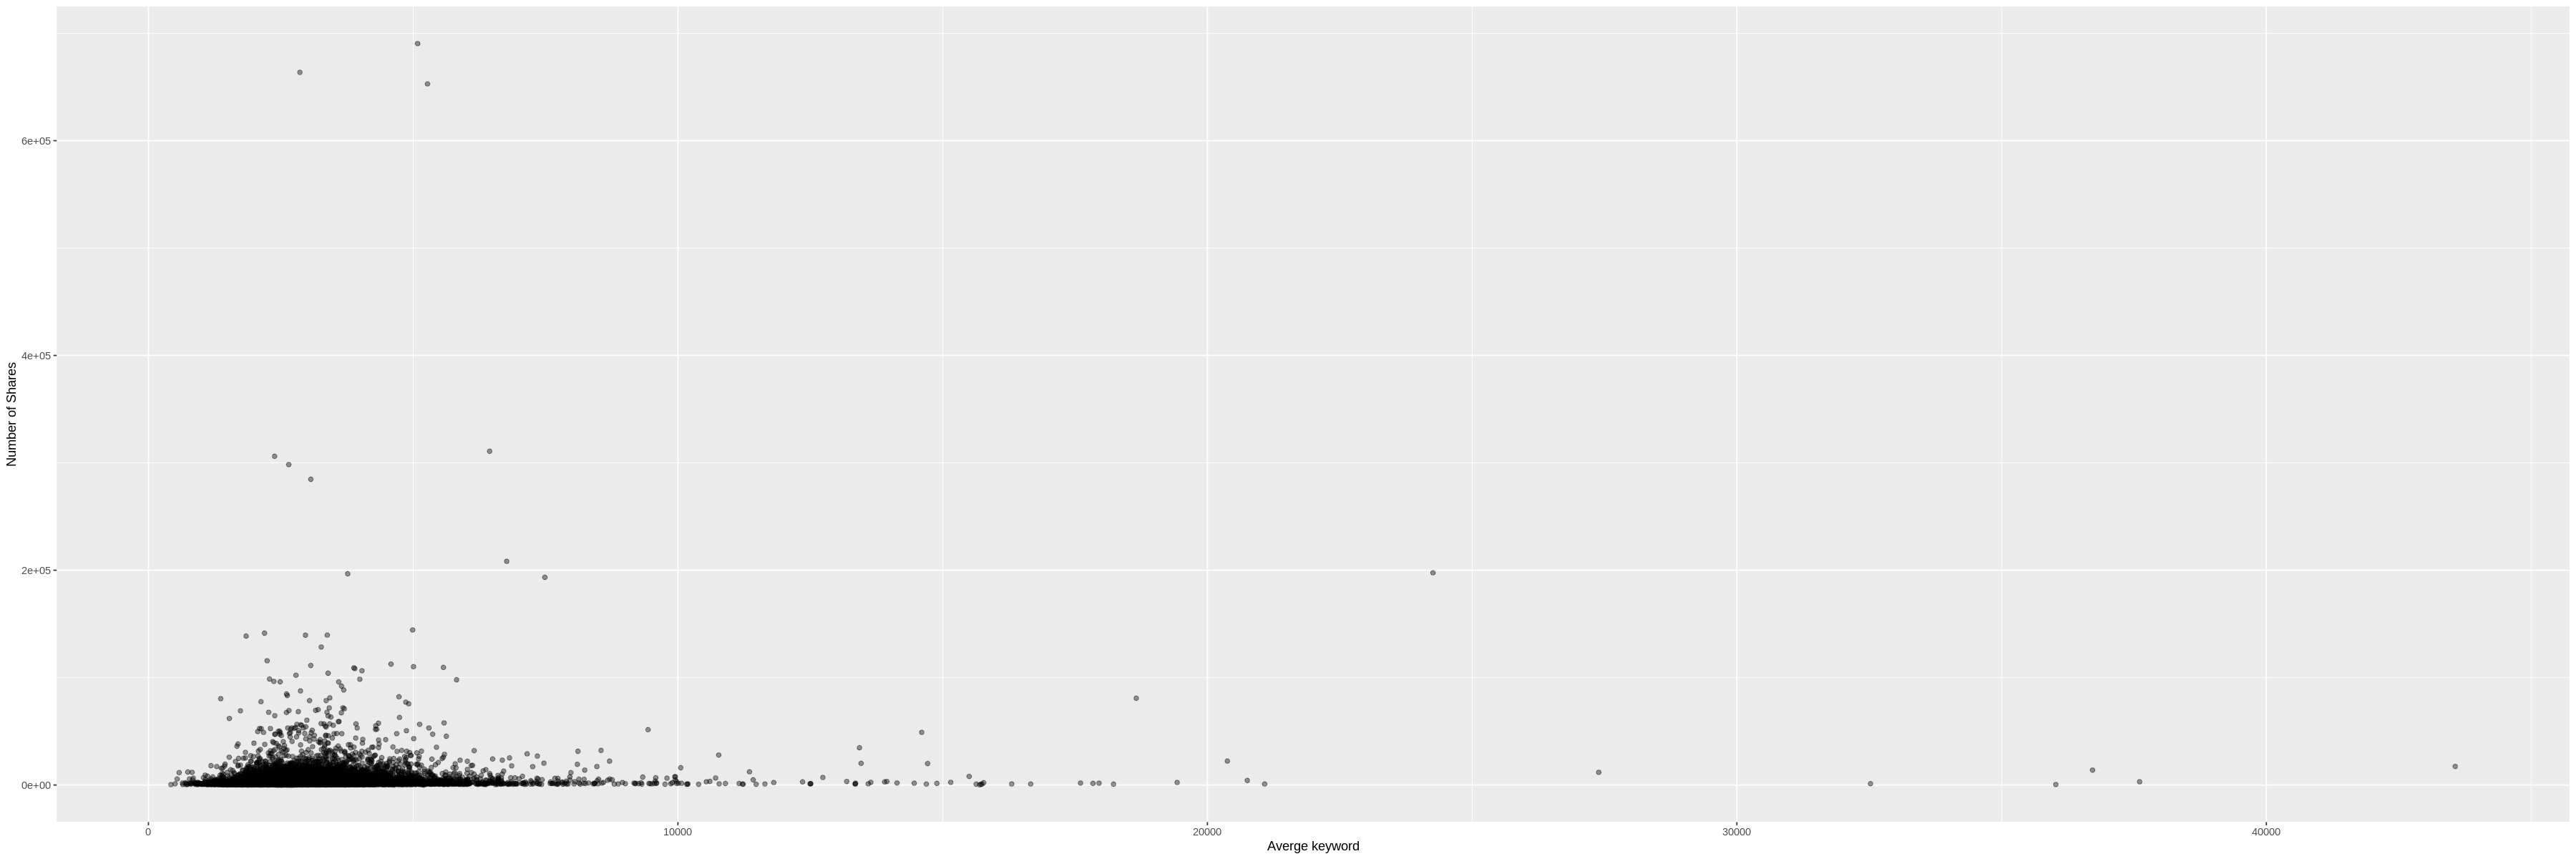

In [20]:
#A visual exploratory analysis of the "average keyword" predictor
eda_kw_rm <- tran_predictors %>% 
                  ggplot(aes(x = kw_avg_avg, y = shares)) +
                  geom_point(alpha = 0.4) +
                  xlab("Averge keyword") +
                  ylab("Number of Shares")
eda_kw_rm

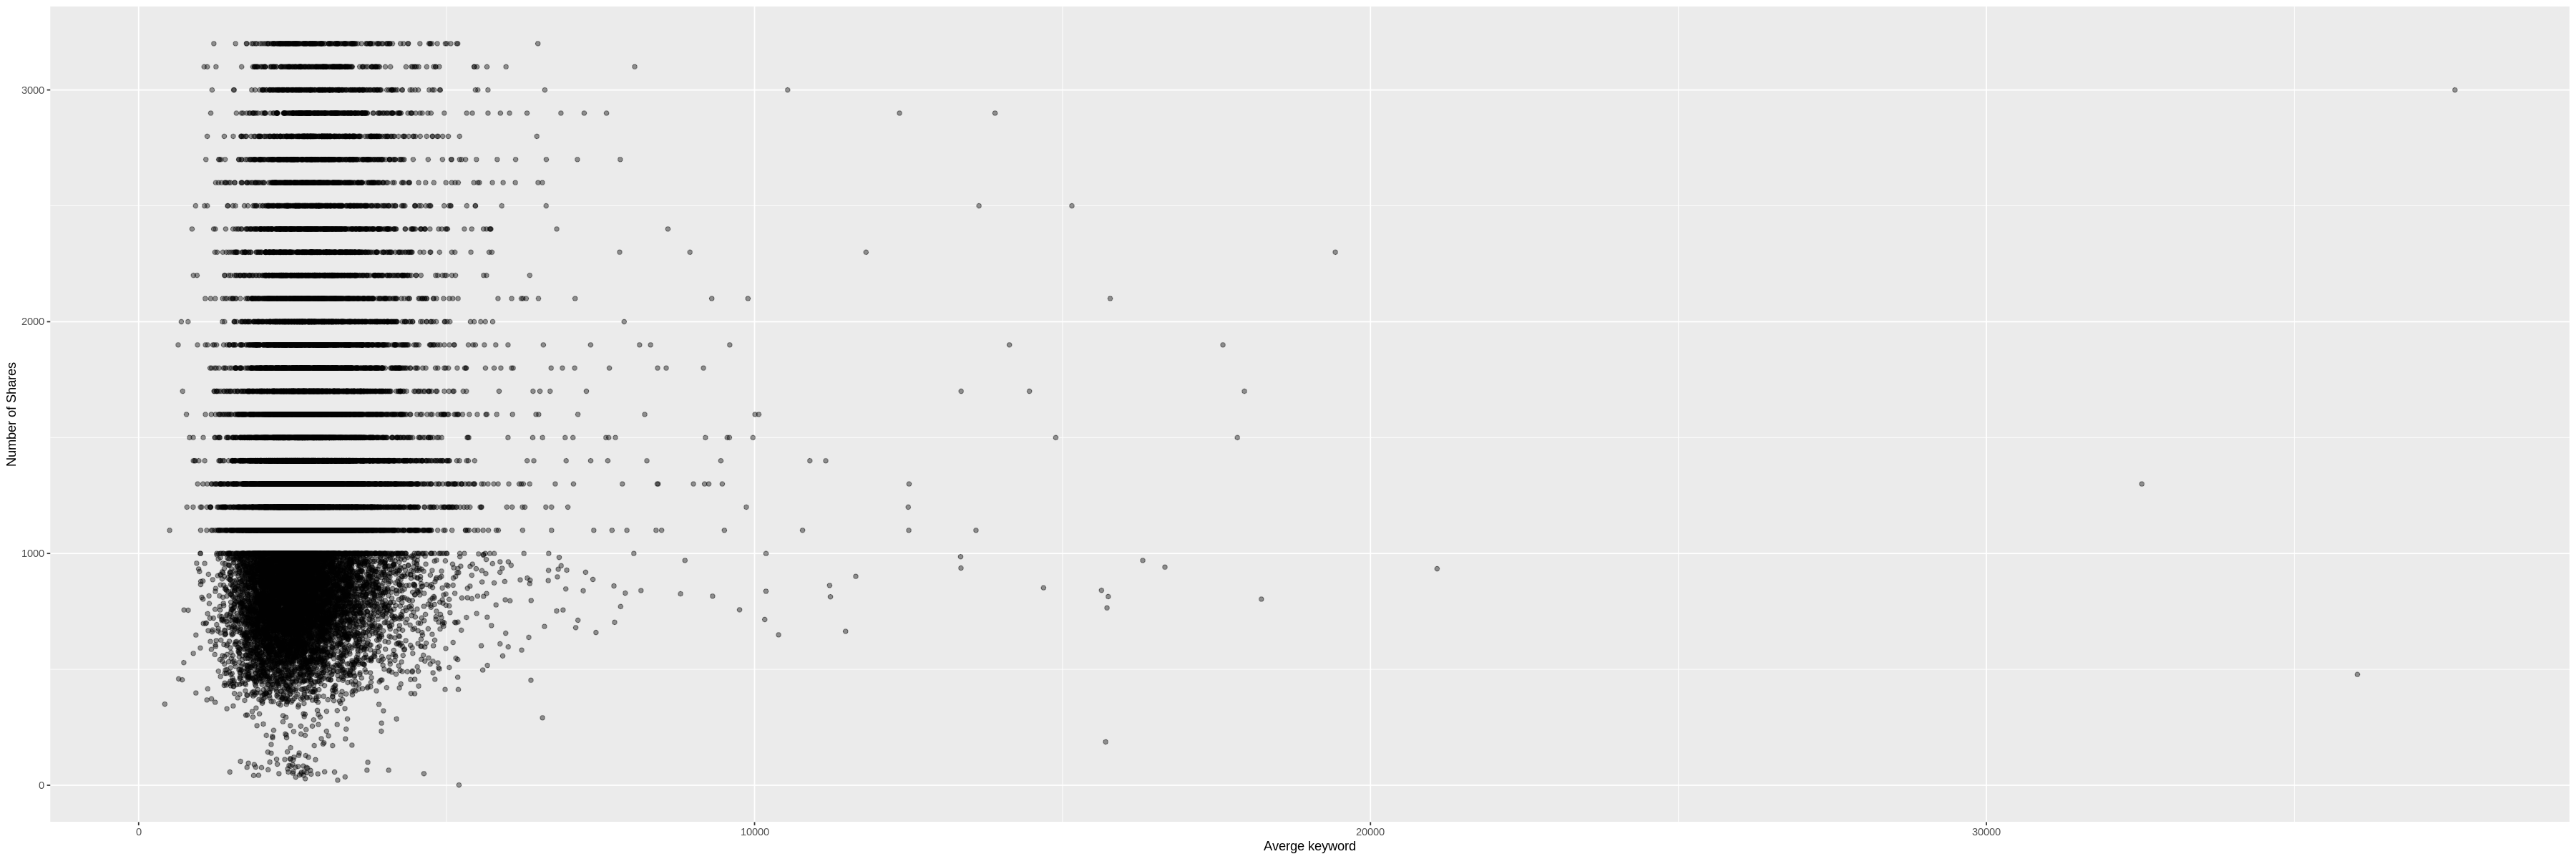

In [21]:
# To get a better sense of the relationship, we will "zoom" into
# the bottom left of the graph above. To do so we will 
#exlude the data points classified as "viral data"
eda_kw_rm_outl <- tran_predictors %>% 
                  filter(popularity != "Viral") %>% 
                  # filter(kw_avg_avg < 10000) %>% 
                  ggplot(aes(x = kw_avg_avg, y = shares)) +
                  geom_point(alpha = 0.4) +
                  xlab("Averge keyword") +
                  ylab("Number of Shares")
eda_kw_rm_outl

 the correlation is small, so it is unlikely we will see a linear pattern

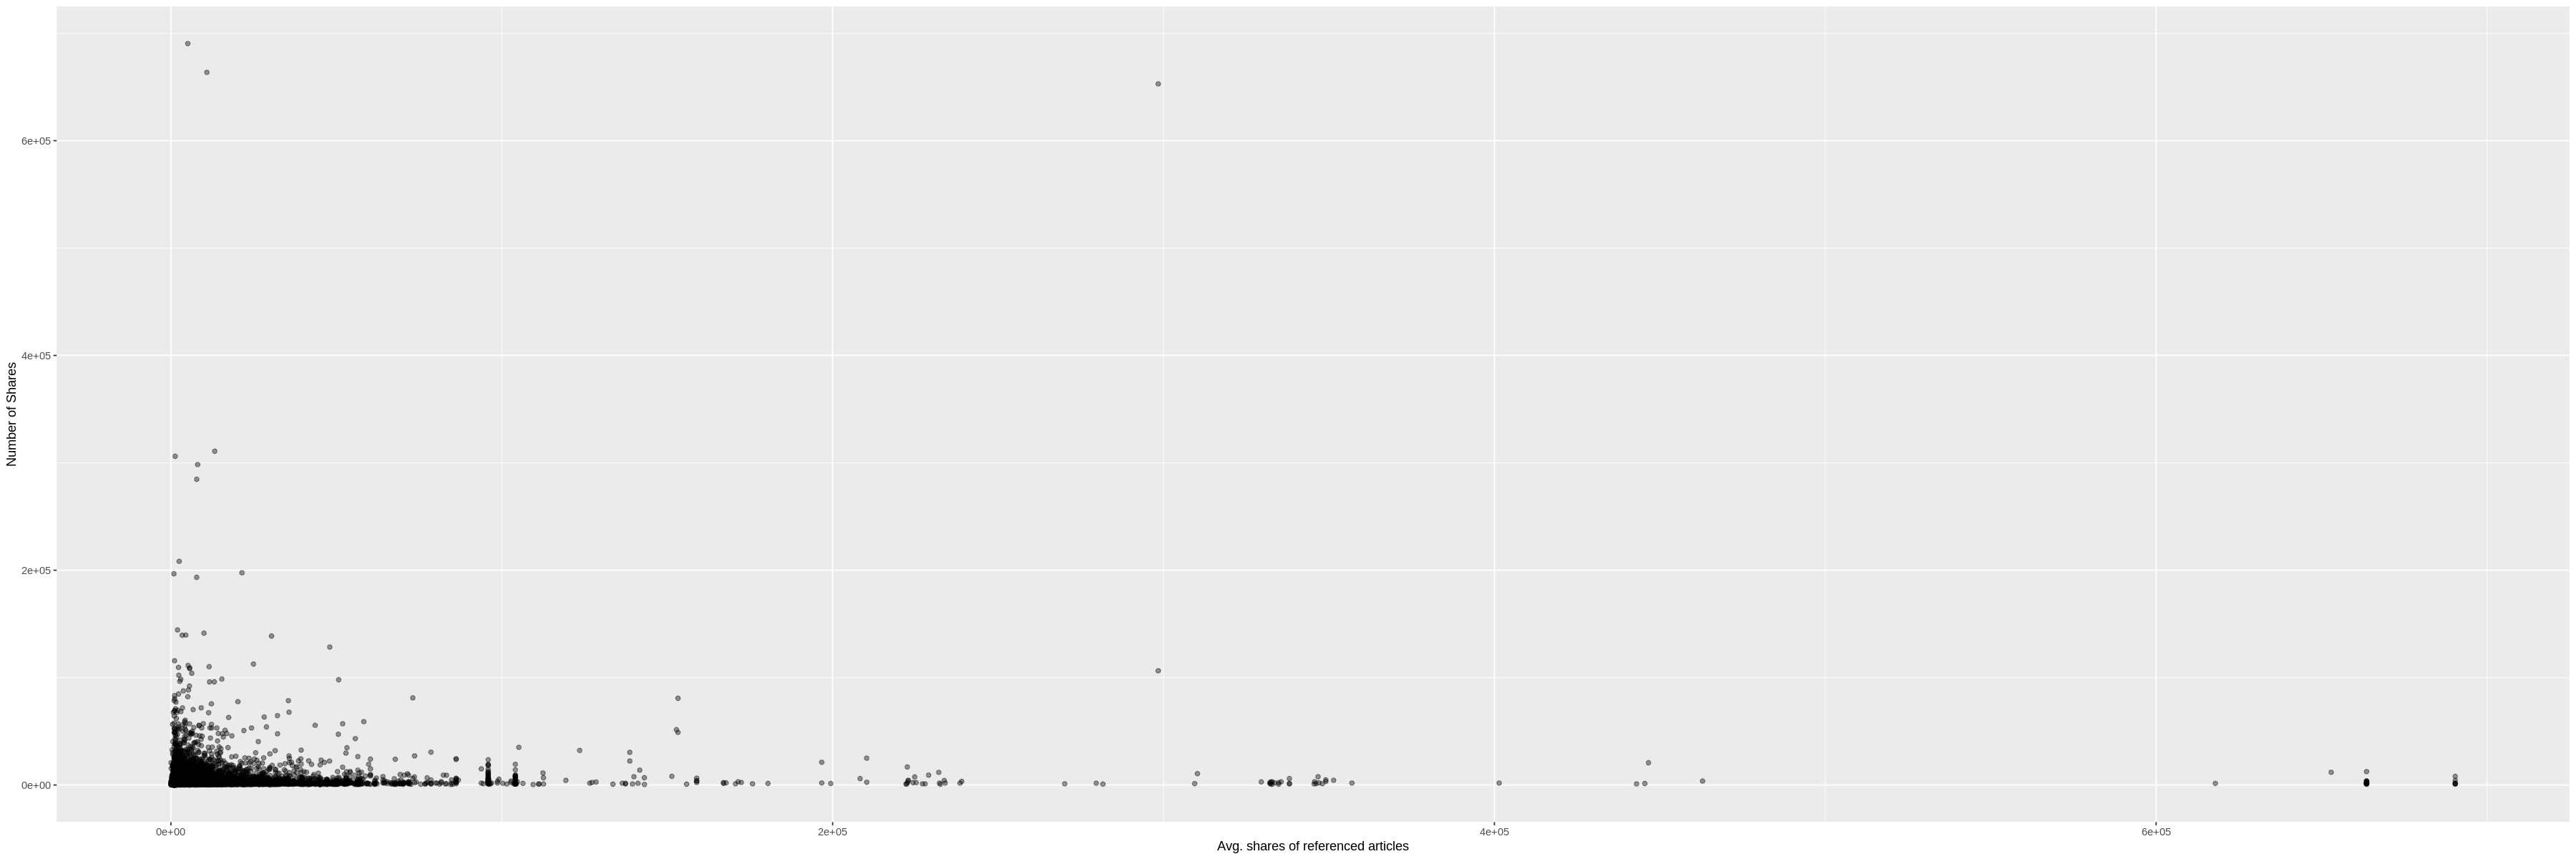

In [22]:
#A visual exploratory analysis of the "average shares of referenced article" predictor
eda_sf_rm <- tran_predictors %>% 
                  ggplot(aes(x = self_reference_avg_sharess, y = shares)) +
                  geom_point(alpha = 0.4) +
                  xlab("Avg. shares of referenced articles") +
                  ylab("Number of Shares")
eda_sf_rm

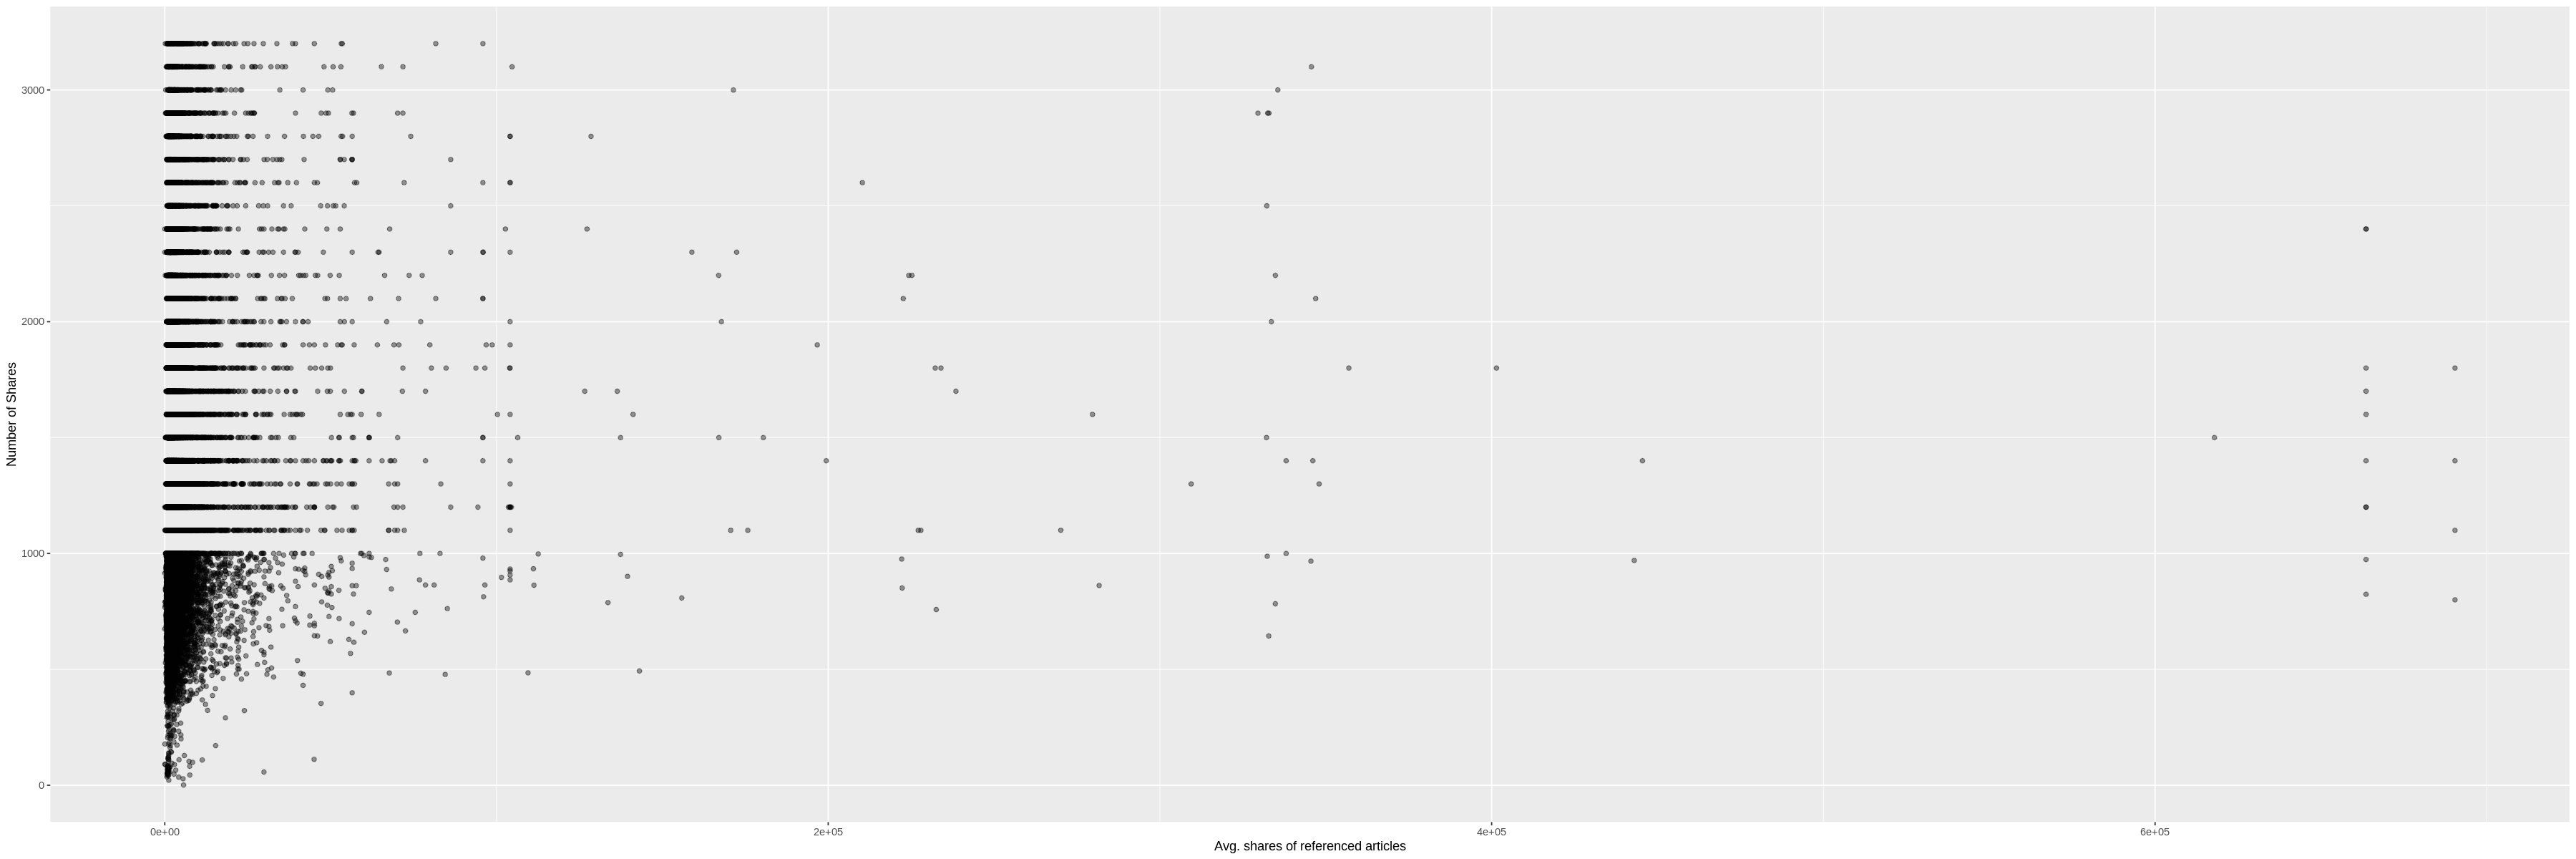

In [23]:
# To get a better sense of the relationship, we will "zoom" into
# the bottom left of the graph above. To do so we will 
#exlude the data points classified as "viral data"
eda_sf_rm_outl <- tran_predictors %>% 
                  filter(popularity != "Viral") %>%
                  # filter(self_reference_avg_sharess < 2e+05) %>%
                  ggplot(aes(x = self_reference_avg_sharess, y = shares)) +
                  geom_point(alpha = 0.4) +
                  xlab("Avg. shares of referenced articles") +
                  ylab("Number of Shares")
eda_sf_rm_outl

 the correlation is small, so it is unlikely we will see a linear pattern

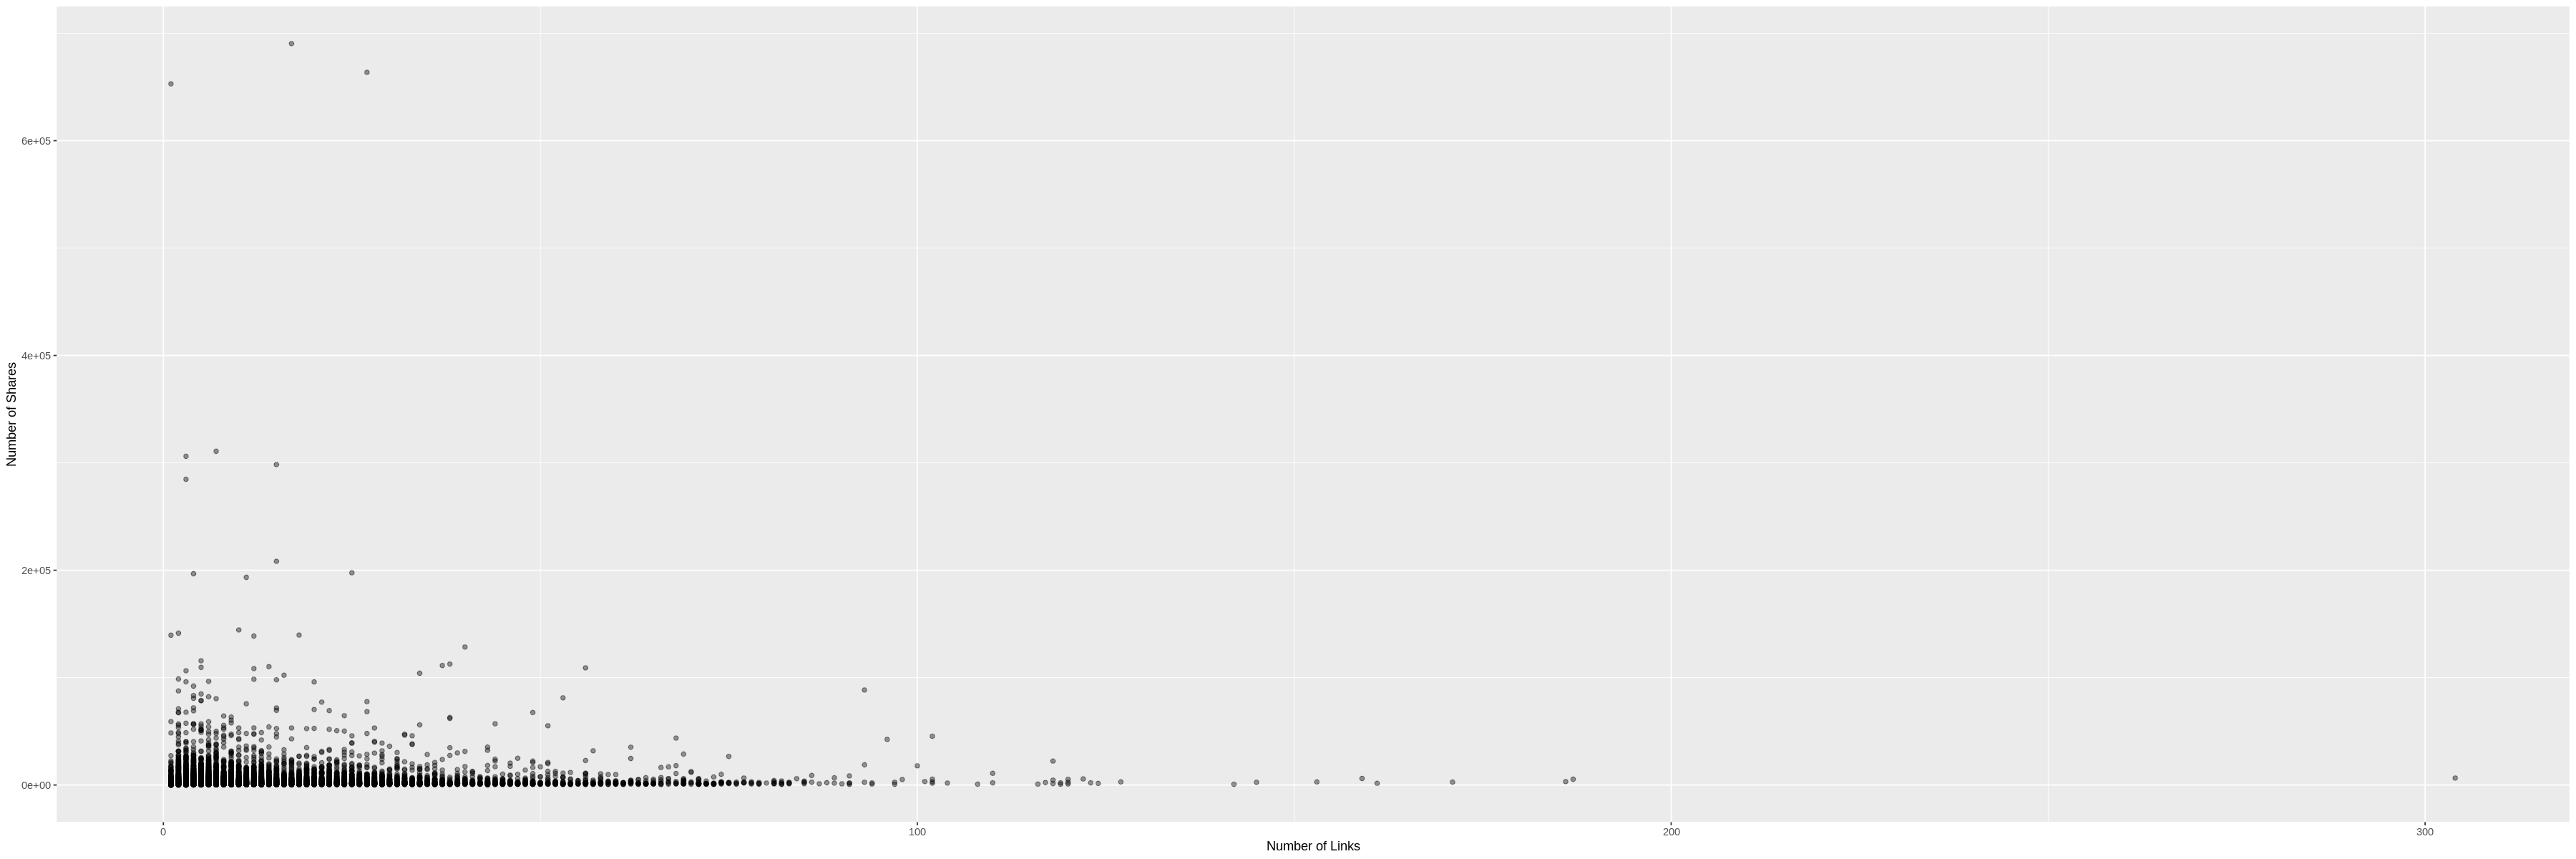

In [24]:
#A visual exploratory analysis of the "Number of links" predictor
eda_ref_rm <- tran_predictors %>% 
                  ggplot(aes(x = num_hrefs, y = shares)) +
                  geom_point(alpha = 0.4) +
                  xlab("Number of Links") +
                  ylab("Number of Shares")
eda_ref_rm

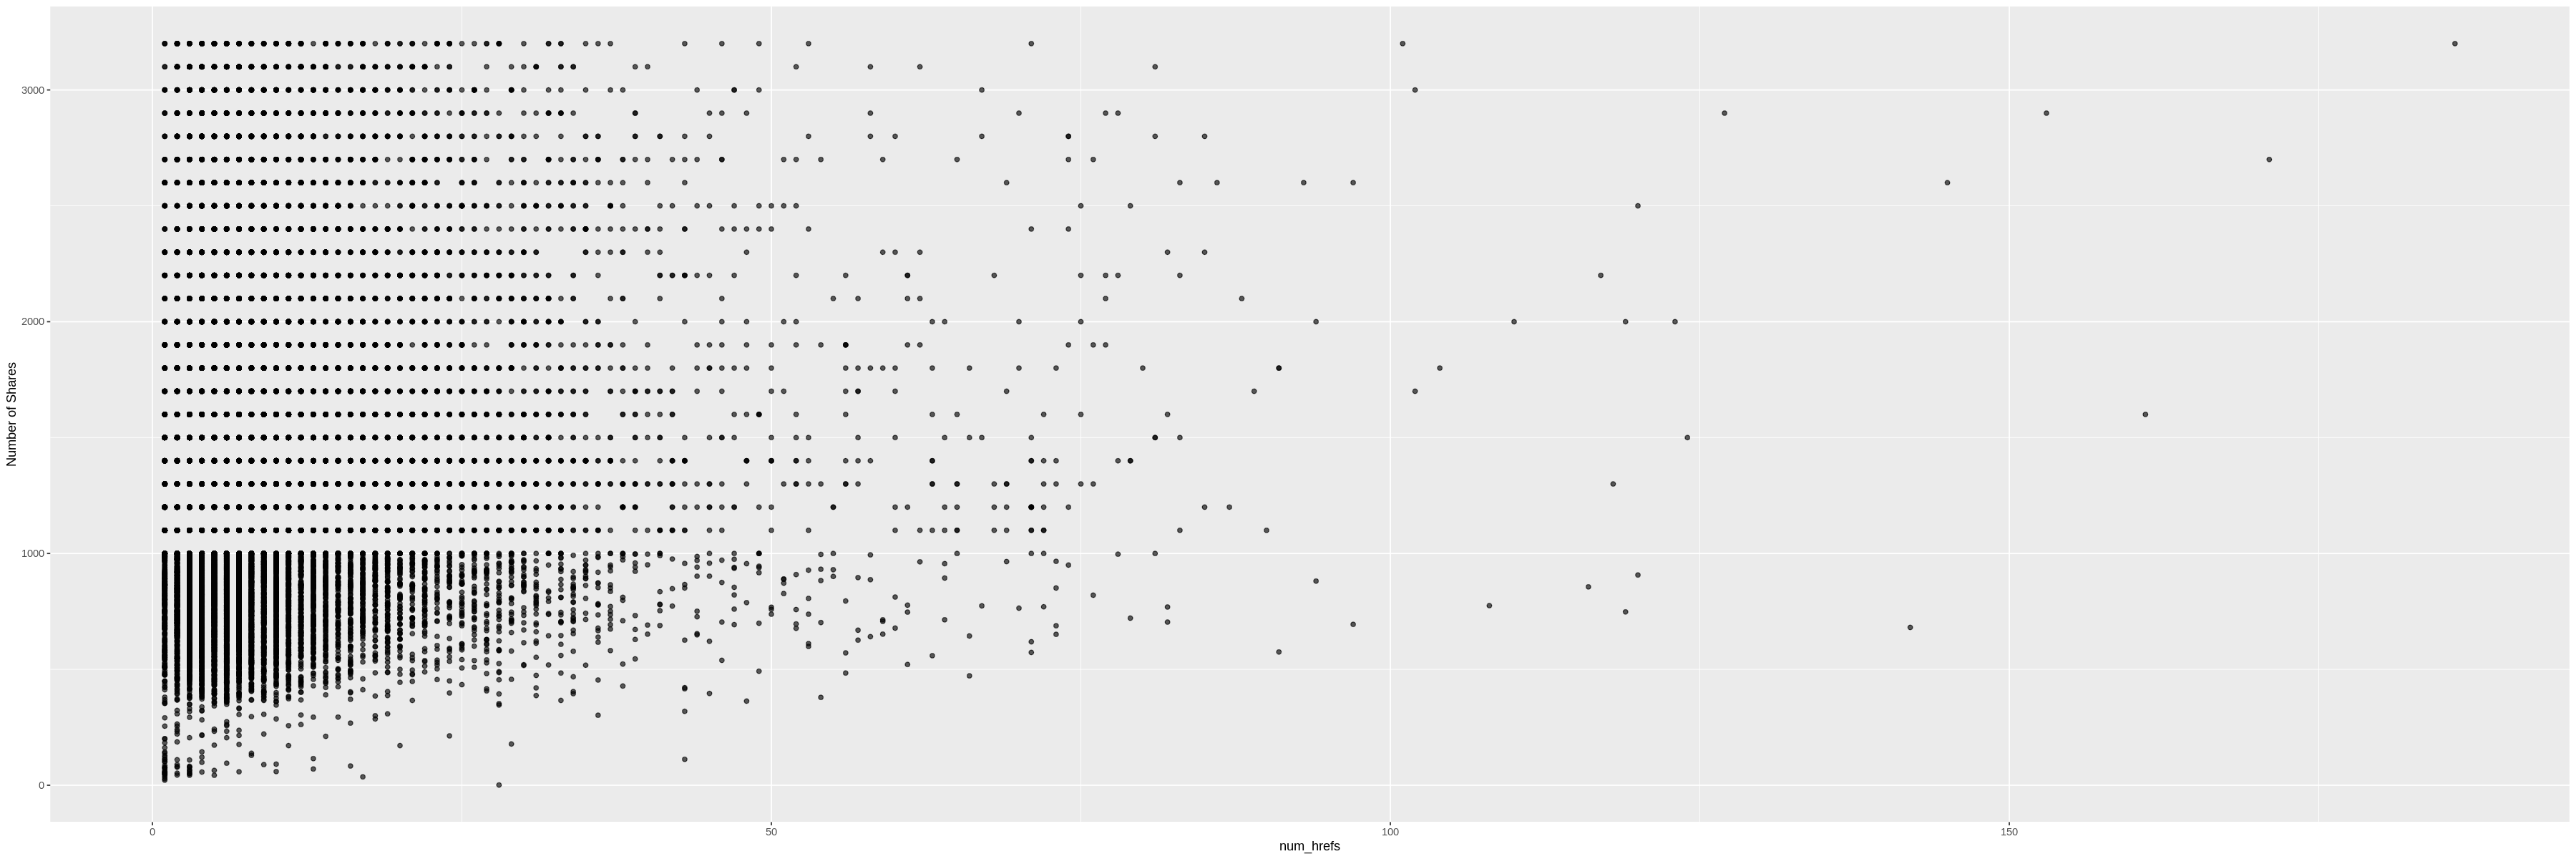

In [25]:
# To get a better sense of the relationship, we will "zoom" into
# the bottom left of the graph above. To do so we will 
#exlude the data points classified as "viral data"
eda_ref_rm_outl <- tran_predictors %>% 
                  filter(popularity != "Viral") %>%
                  # filter(self_reference_avg_sharess < 2e+05) %>%
                  ggplot(aes(x = num_hrefs, y = shares)) +
                  geom_point(alpha = 0.4) +
                  geom_point(alpha = 0.4) +
                  ylab("Number of Shares")
eda_ref_rm_outl

the correlation is small, so it is unlikely we will see a linear pattern

In [26]:
#A count of the observations in each popularity category
tran_predictors %>% group_by(popularity) %>% 
                    summarise(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



popularity,count
<fct>,<int>
Not_Popular,610
Popular,9019
Somewhat_Popular,12595
Viral,5146


Warning message:
“Removed 303 rows containing non-finite values (stat_boxplot).”


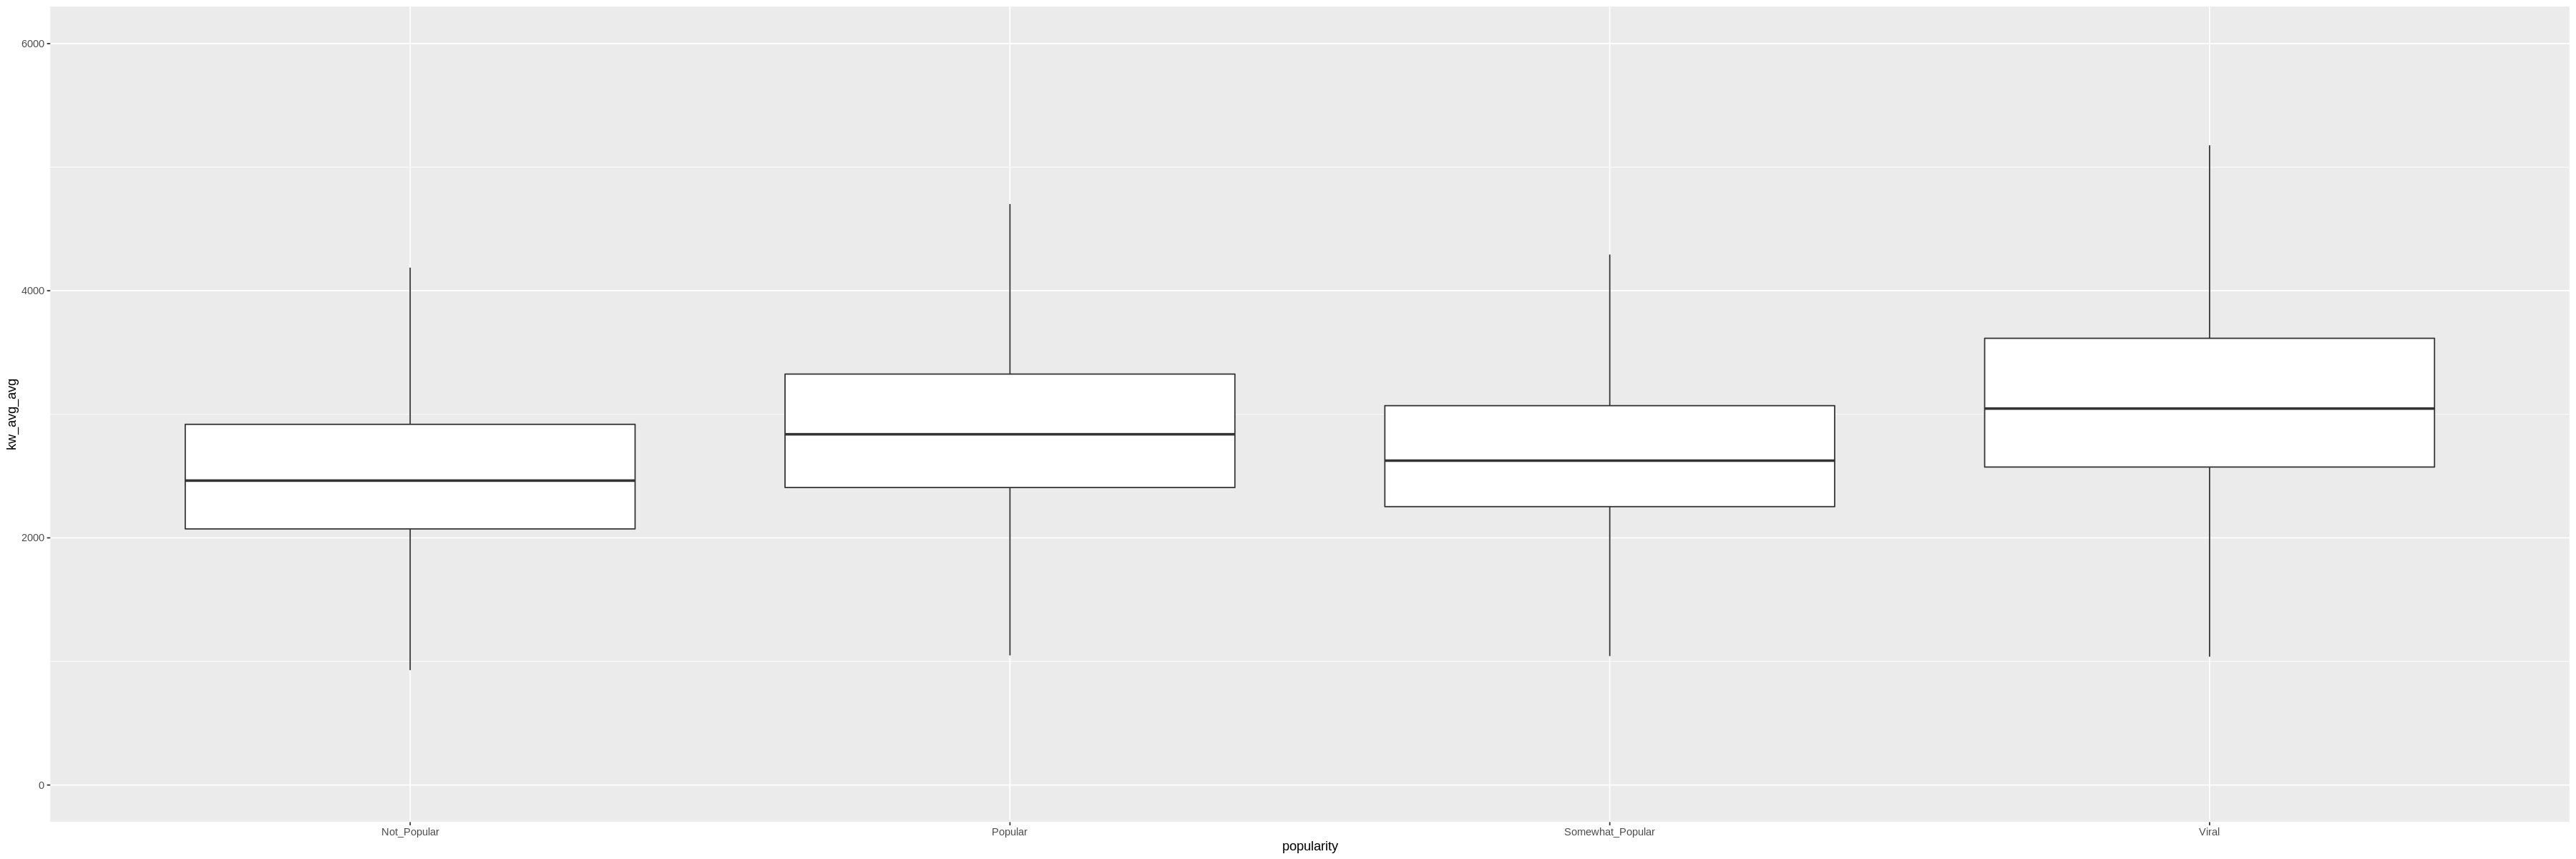

In [27]:
#We decided to see the relationship between the popularity class labels and the chosen predictors using boxplots

#This is a boxplot of popularity to the predictor, "keyword average"
ggplot(tran_predictors, aes(x = popularity, y = kw_avg_avg)) +
geom_boxplot(outlier.shape = NA) +
   ylim(0, 6000)


Warning message:
“Removed 6334 rows containing non-finite values (stat_boxplot).”


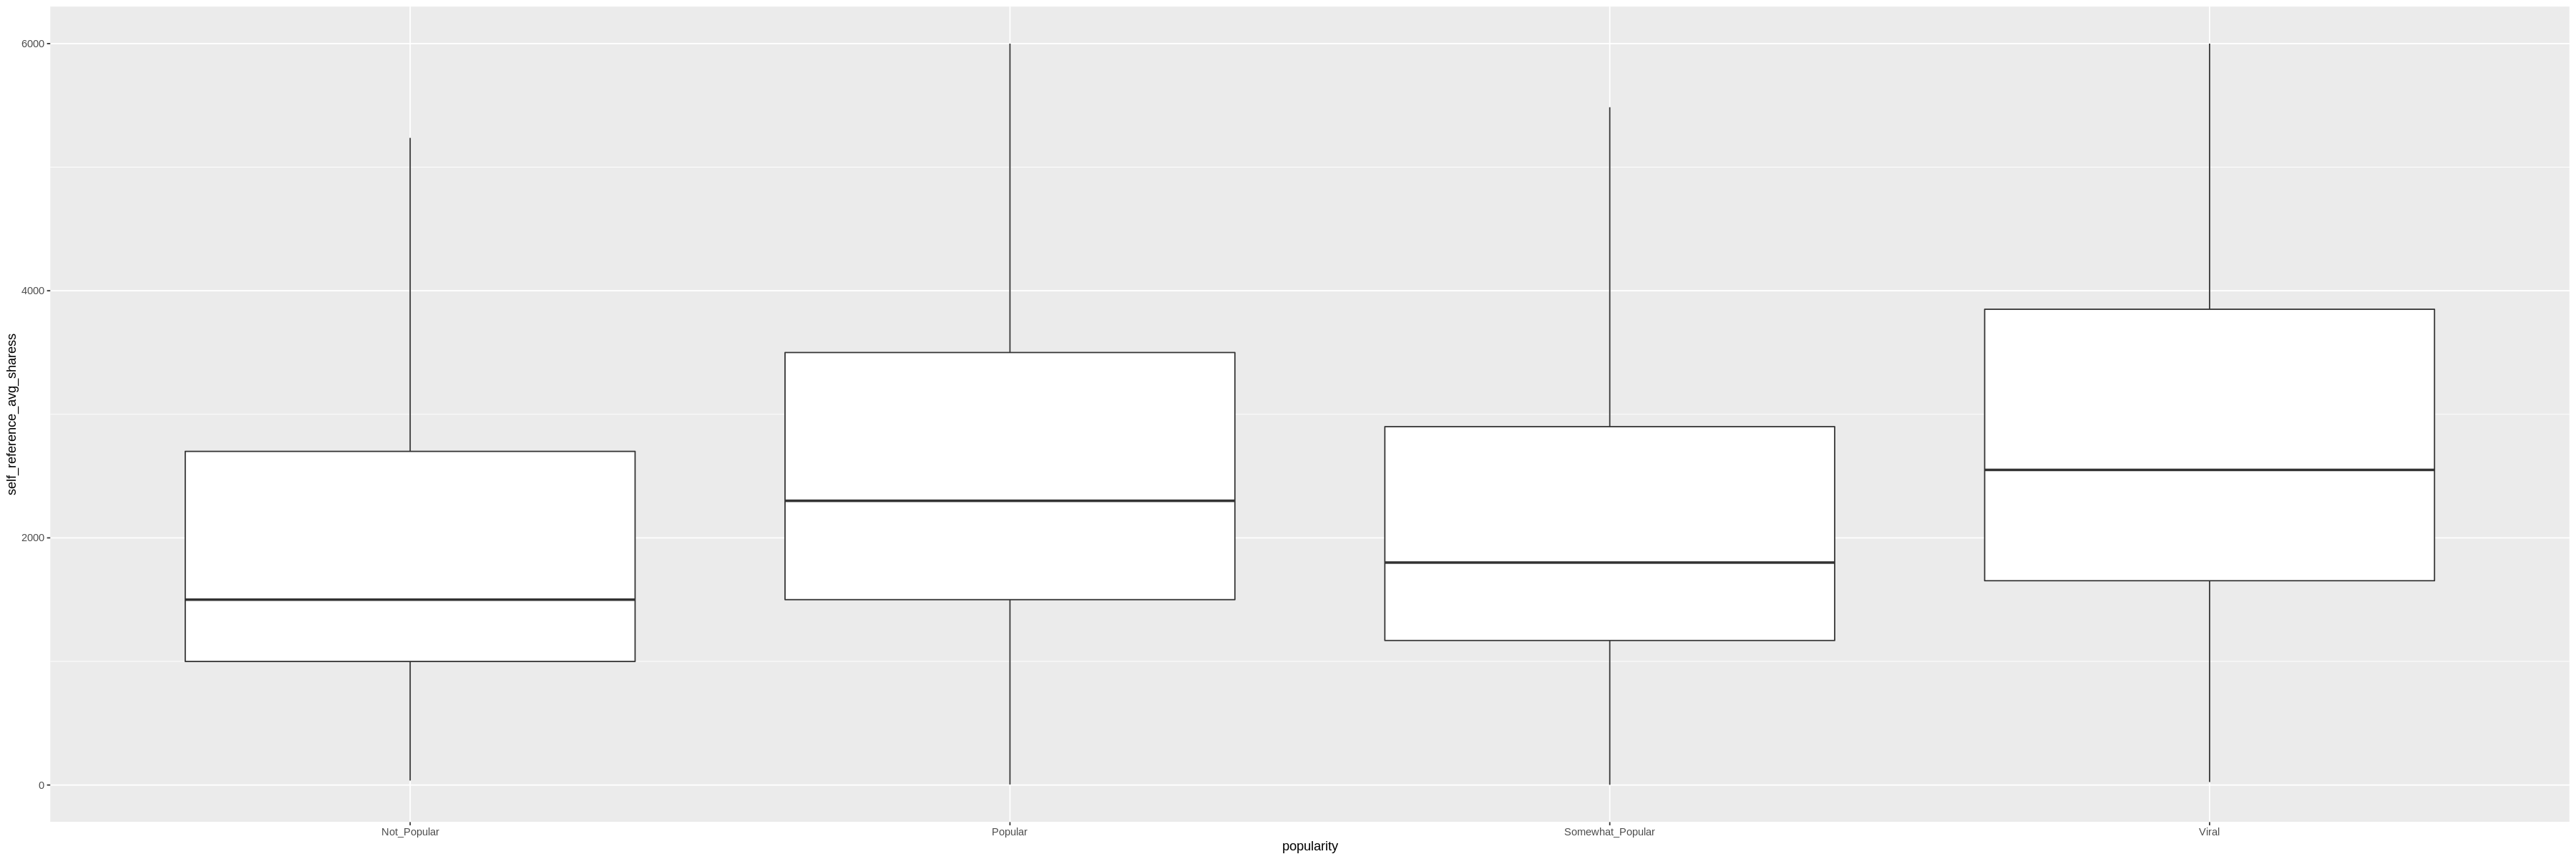

In [28]:
#This is a boxplot of popularity to the predictor, "Avg. shares of referenced articles"
ggplot(tran_predictors, aes(x = popularity, y = self_reference_avg_sharess)) +
geom_boxplot(outlier.shape = NA) +
   ylim(0, 6000)

Warning message:
“Removed 1334 rows containing non-finite values (stat_boxplot).”


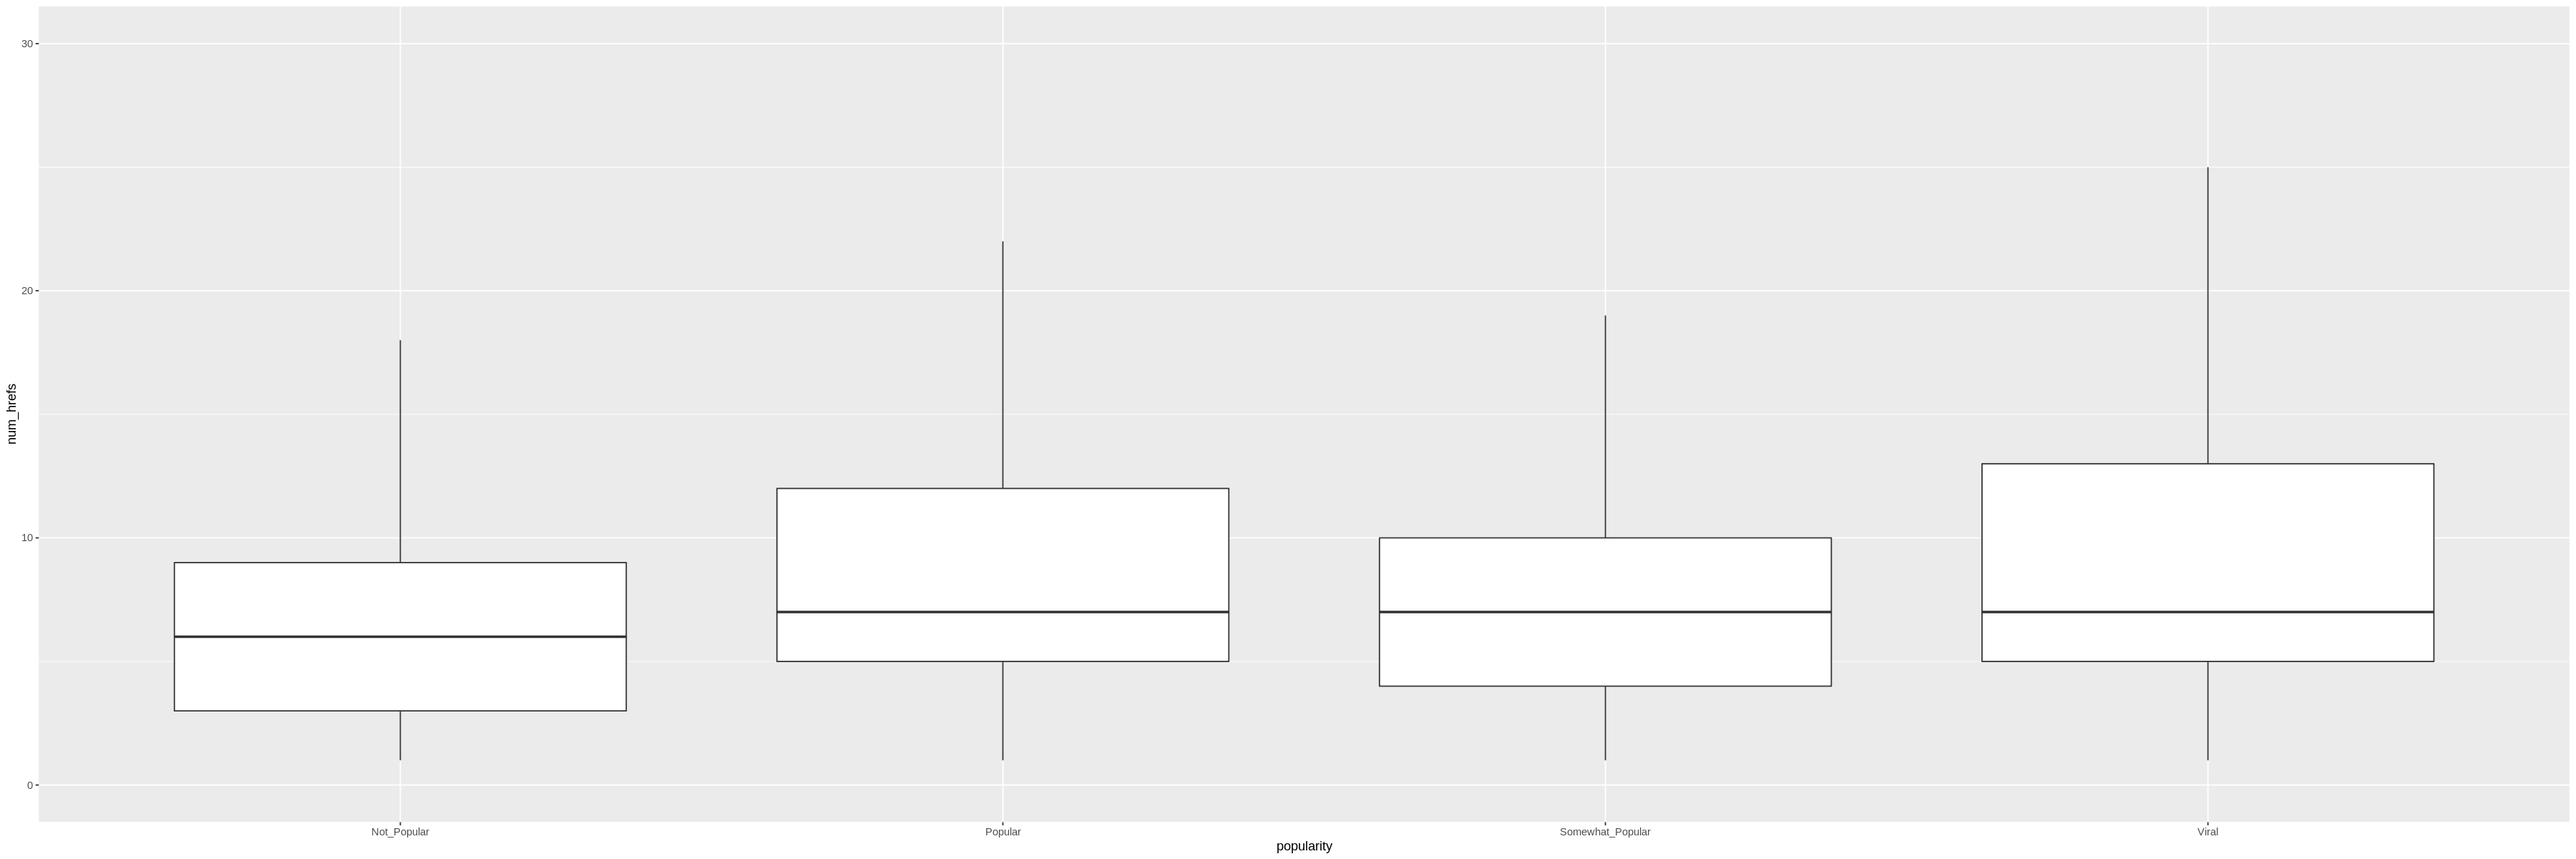

In [29]:
#This is a boxplot of popularity to the predictor, "Number of links"
ggplot(tran_predictors, aes(x = popularity, y = num_hrefs)) +
geom_boxplot(outlier.shape = NA) +
   ylim(0, 30)

### KNN regression analysis

we have decided to use regression over classification. This is a result of the imbalance problem in our four categories of data, which has significantly different number depends on the range, and leads inaccuracy in knn_classification, which its result in showing one category which have the most of the data samples. In order to solve this issue, the solution would be upsampling. However, this resulted in an exponential time increase since the size of data would be huge and obviously increase the complexity of cross validation, which possibly take more than 1 hour to run, even the dataset now take about 5 to 10 mins. Due to time constraints and the equipment available, we therefore have decided to use regression.

In [30]:
## Now we know which predictors we need and what kind of outliers & missing values to remove,
## we now create a dataset based on the predictors we found in the exploratory data analysis.

## We retrain our data based on those info
news_processed = news %>% 
                select(kw_avg_avg, self_reference_avg_sharess, num_hrefs, shares) %>% 
                filter(kw_avg_avg != 0) %>% 
                filter(self_reference_avg_sharess != 0) %>% 
                filter(num_hrefs != 0) %>% 
                distinct()
head(news_processed)

kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares
<dbl>,<dbl>,<dbl>,<dbl>
804.3803,3100.000,5,755
1184.5600,727.000,4,4600
1114.0240,951.000,5,1300
884.8520,1300.000,14,1200
1539.4172,3151.158,20,1500
713.9192,20900.000,3,1700


In [31]:
## Re-train our data in a regression manner

splitted_data <- initial_split(news_processed, prop = 0.80, strata = shares)  
train <- training(splitted_data)   
test <- testing(splitted_data)
head(train)
head(test)


kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares
<dbl>,<dbl>,<dbl>,<dbl>
1184.5600,727.000,4,4600
1114.0240,951.000,5,1300
1539.4172,3151.158,20,1500
713.9192,20900.000,3,1700
1466.2104,3151.158,21,1200
1645.5334,3151.158,20,500


kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares
<dbl>,<dbl>,<dbl>,<dbl>
804.3803,3100.000,5,755
884.8520,1300.000,14,1200
826.6296,1834.500,3,1500
1366.7938,3500.000,10,2300
1644.3611,4657.667,8,1800
424.3444,5000.000,3,350


In [32]:
#the necessary steps to create our knn model
news_knn_recipe = recipe(shares ~ ., data = train)

news_knn_recipe

news_knn_spec = nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
                set_engine("kknn") %>%
                set_mode("regression")

news_knn_spec

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [33]:
news_vfold = vfold_cv(train, v = 5, strata = shares)

news_knn_workflow = workflow() %>% 
                    add_recipe(news_knn_recipe) %>%
                    add_model(news_knn_spec)

news_knn_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [34]:
#tuning our KNN model to determine a good K value
gridvals = tibble(neighbors = 1:20)

news_knn_results = news_knn_workflow %>% 
                    tune_grid(resamples = news_vfold, grid = gridvals) %>%
                    collect_metrics()

head(news_knn_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,1.503143e+04,5,1.213487e+03,Model01
1,rsq,standard,2.898231e-04,5,1.104846e-04,Model01
2,rmse,standard,1.278411e+04,5,9.880688e+02,Model02
2,rsq,standard,6.123231e-04,5,1.333307e-04,Model02
3,rmse,standard,1.241413e+04,5,8.668761e+02,Model03
3,rsq,standard,5.919815e-04,5,1.160009e-04,Model03


In [35]:
#determine an RMSPE to assess the models accuracy
knn_rmspe = news_knn_results %>% 
            filter(.metric == "rmse") %>% 
            select(mean) %>% 
            arrange(mean) %>% 
            slice(1) %>% 
            pull()
            
knn_rmspe

[1] 10817.6

So we get a knn regression with a RMSPE of 10356.13. We will then try to use linear regression to see which one is better

### Linear Regression

In [36]:
#We will create a model with linear regression and compare which model works better for our data
lm_spec = linear_reg() %>% 
          set_engine("lm") %>% 
          set_mode("regression")

news_recipe = recipe(shares ~ ., data = train) 

news_lm_fit = workflow() %>% 
        add_recipe(news_recipe) %>% 
        add_model(lm_spec) %>% 
        fit(data = train)

news_lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
               (Intercept)                  kw_avg_avg  
                  11.94668                     0.88272  
self_reference_avg_sharess                   num_hrefs  
                   0.01816                    29.57685  


In [37]:
#The dataset results of the linear regression model
news_lm_pred = news_lm_fit %>% 
              predict(test) %>% 
              bind_cols(test)
head(news_lm_pred)

.pred,kw_avg_avg,self_reference_avg_sharess,num_hrefs,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
926.1706,804.3803,3100.000,5,755
1230.7101,884.8520,1300.000,14,1200
863.6765,826.6296,1834.500,3,1500
1577.7748,1366.7938,3500.000,10,2300
1784.6588,1644.3611,4657.667,8,1800
566.0522,424.3444,5000.000,3,350


In [38]:
#The RMPSE of our linear model
news_lm_rmspe =  news_lm_pred %>% 
        metrics(truth = shares, estimate = .pred) %>% 
        filter(.metric == "rmse") %>% 
        select(.estimate) %>% 
        pull()
news_lm_rmspe

[1] 6158.063

### Compare KNN and linear regression

In [39]:
if(knn_rmspe < news_lm_rmspe){
  print("We use knn-regresion as it has a smaller RMSPE")
} else{
  print("we use simple linear regression as it has a smaller RMSPE")
}
knn_rmspe
news_lm_rmspe

[1] "we use simple linear regression as it has a smaller RMSPE"


[1] 10817.6

[1] 6158.063

### Visualization of our prediction

In [40]:
#We have provided a summary of our linear regression model
lmplot <- lm(shares ~ ., data = news_processed)
summary(lmplot)

## https://rpubs.com/bensonsyd/385183


Call:
lm(formula = shares ~ ., data = news_processed)

Residuals:
   Min     1Q Median     3Q    Max 
-31266  -1848  -1266   -287 685479 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.298e+02  1.741e+02   0.746    0.456    
kw_avg_avg                 8.181e-01  5.450e-02  15.012  < 2e-16 ***
self_reference_avg_sharess 1.855e-02  2.364e-03   7.848 4.37e-15 ***
num_hrefs                  3.163e+01  5.447e+00   5.807 6.44e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10040 on 27368 degrees of freedom
Multiple R-squared:  0.01387,	Adjusted R-squared:  0.01376 
F-statistic: 128.3 on 3 and 27368 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula 'y ~ x'



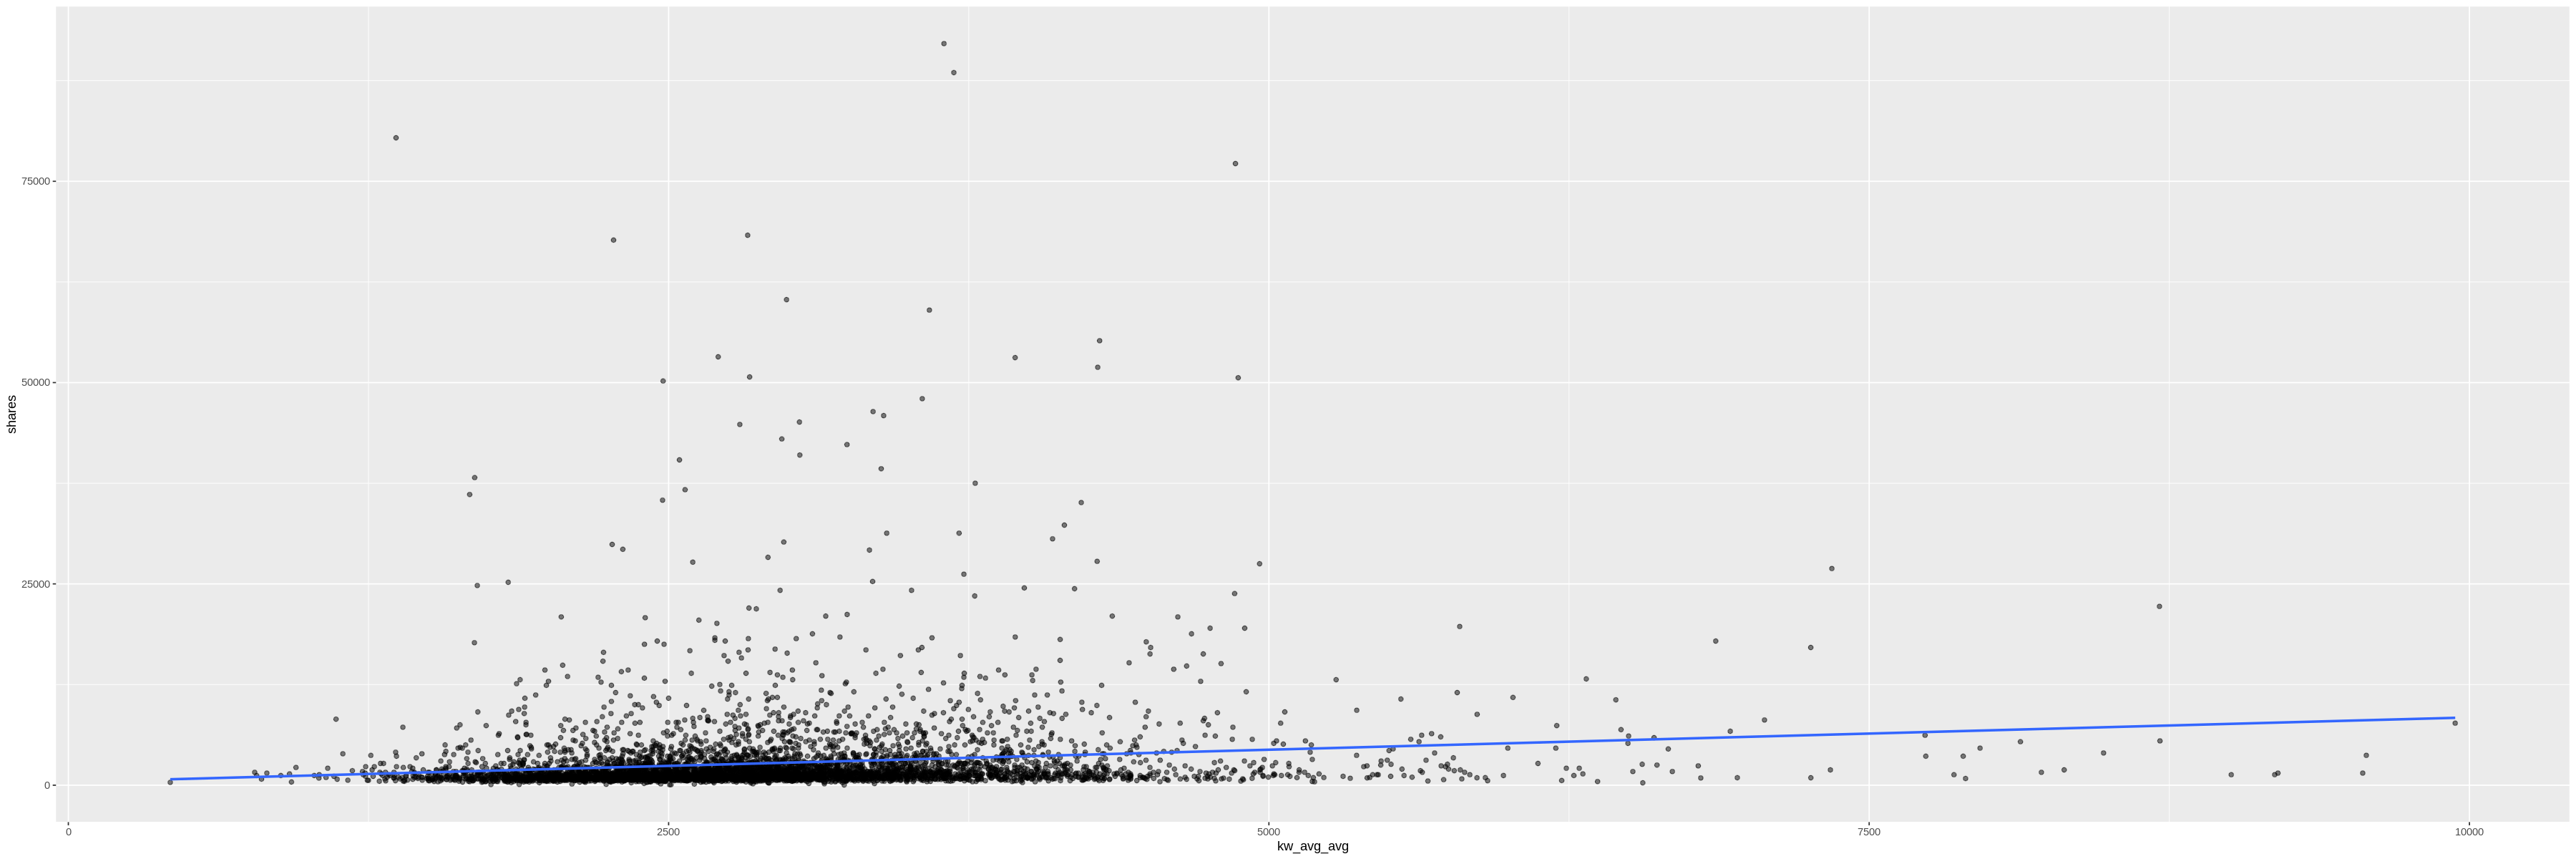

In [41]:
## due to the outliers of the data, we will zoom into a portion using filters.
## To see the original unzoomed plots, uncomment the code below

# lm_kw = news_lm_pred %>% 
#         ggplot(aes(x = kw_avg_avg, y = shares)) +
#         geom_point(alpha = 0.5) + 
#         geom_smooth(method = "lm", se = FALSE) +
#         labs(x = "Averge Keyword")
# lm_kw
        
lm_kw_zm = news_lm_pred %>% 
        filter(kw_avg_avg < 10000) %>% 
        filter(shares < 1e+05) %>% 
        ggplot(aes(x = kw_avg_avg, y = shares)) +
        geom_point(alpha = 0.5) + 
        geom_smooth(method = "lm", se = FALSE)
lm_kw_zm


`geom_smooth()` using formula 'y ~ x'



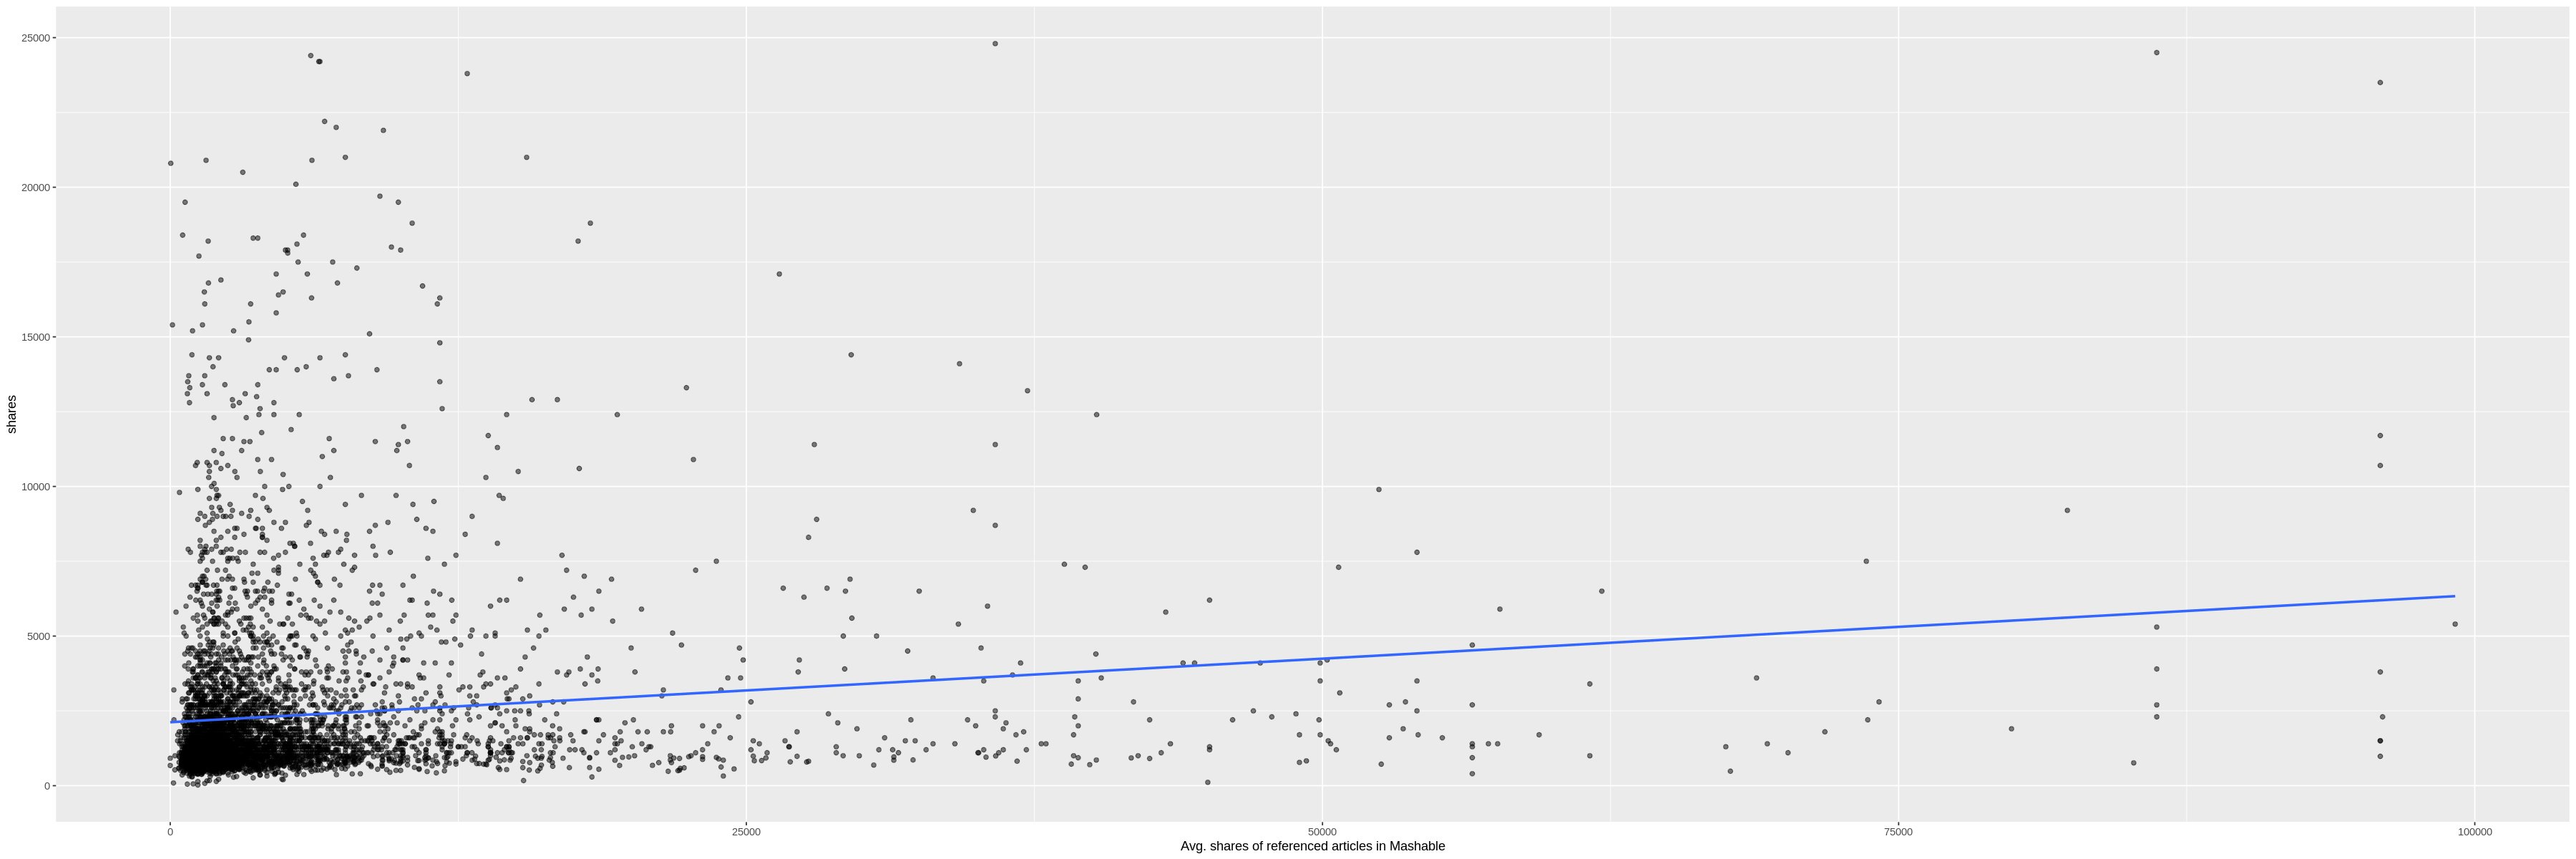

In [42]:
## due to the outliers of the data, we will zoom into a portion using filters.
## To see the original unzoomed plots, uncomment the code below

# lm_self_ref = news_lm_pred %>% 
#         ggplot(aes(x = self_reference_avg_sharess, y = shares)) +
#         geom_point(alpha = 0.5) + 
#         geom_smooth(method = "lm", se = FALSE) +
#         labs(x = "Avg. shares of referenced articles in Mashable")
# lm_self_ref
        

lm_self_ref_zm = news_lm_pred %>% 
        filter(self_reference_avg_sharess < 1e+05) %>% 
        filter(shares < 25000) %>% 
        ggplot(aes(x = self_reference_avg_sharess, y = shares)) +
        labs(x = "Avg. shares of referenced articles in Mashable") +
        geom_point(alpha = 0.5) + 
        geom_smooth(method = "lm", se = FALSE)
lm_self_ref_zm


`geom_smooth()` using formula 'y ~ x'



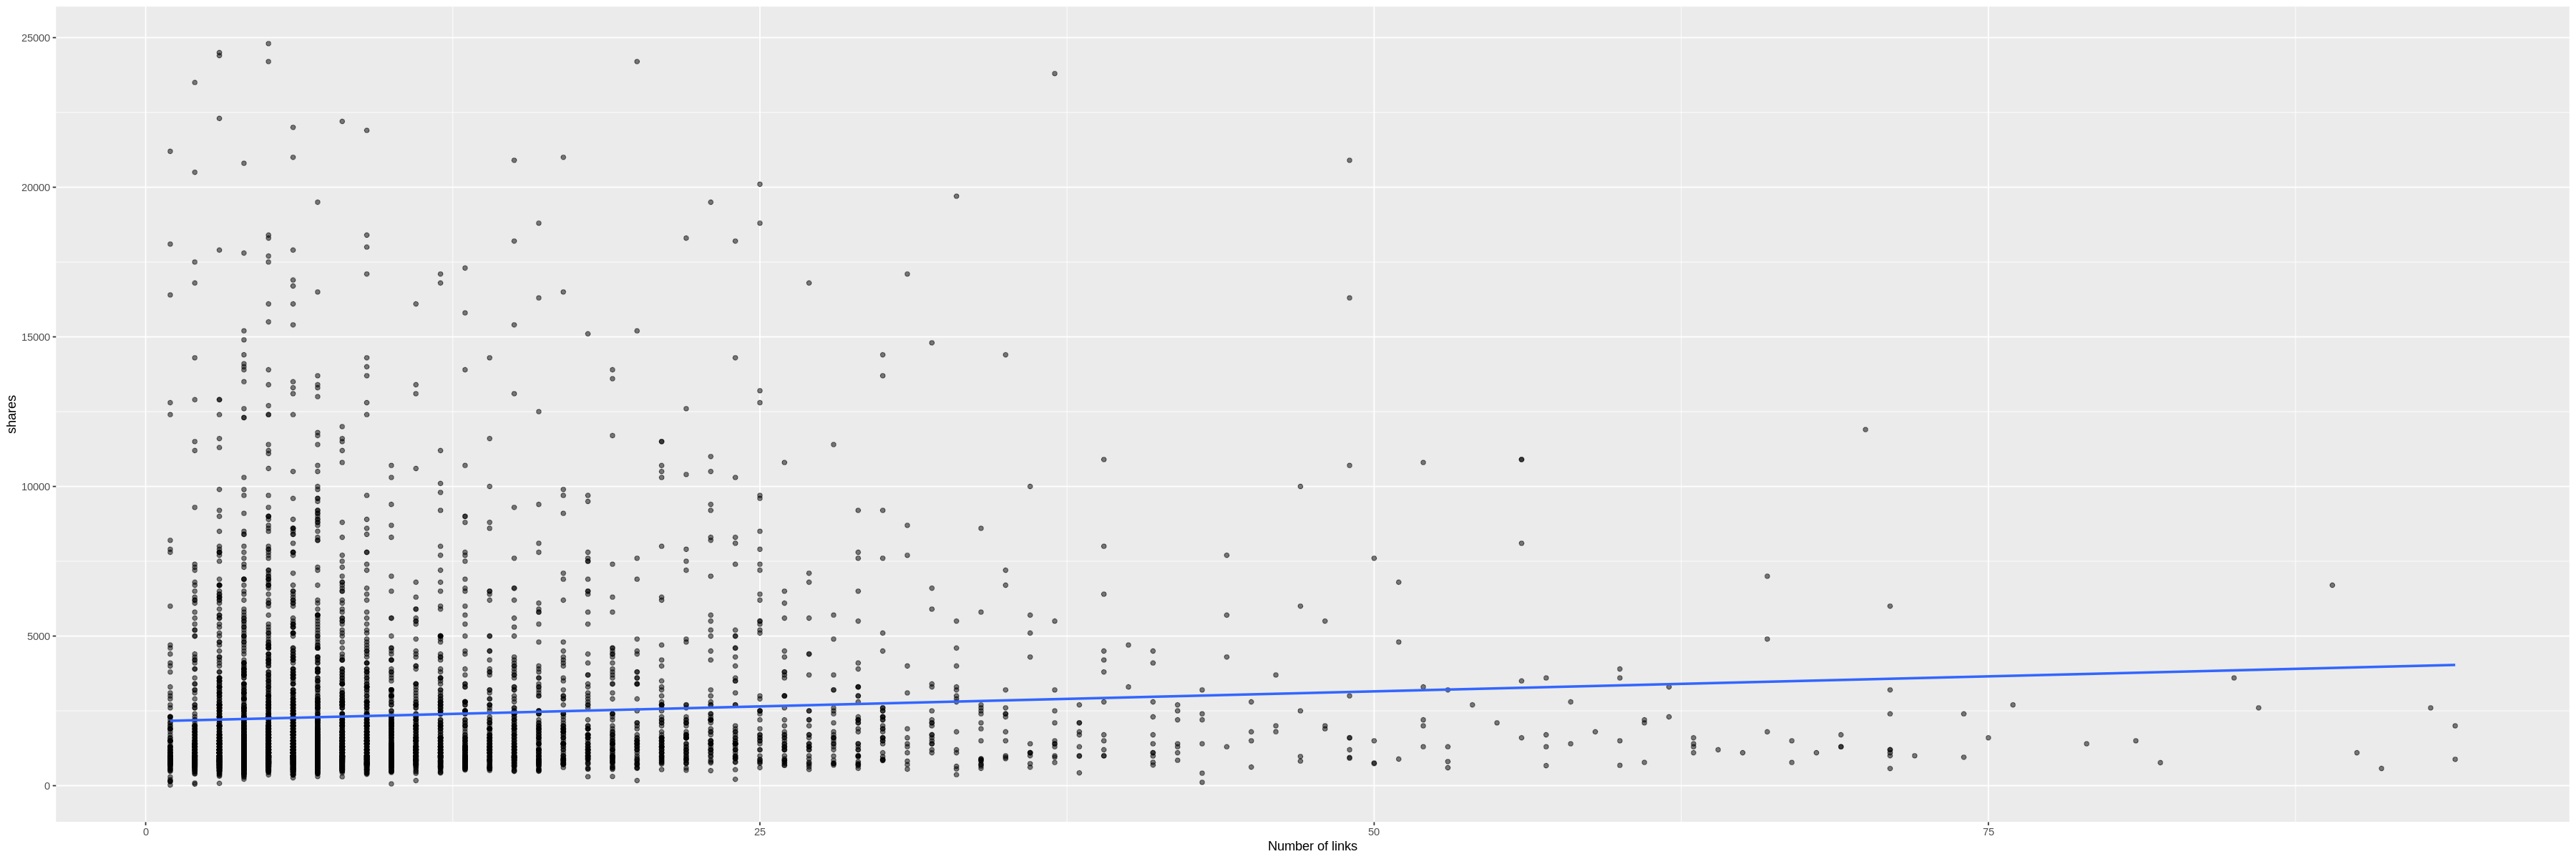

In [43]:
## due to the outliers of the data, we will zoom into a portion using filters.
## To see the original unzoomed plots, uncomment the code below

# lm_num_hrefs = news_lm_pred %>% 
#         ggplot(aes(x = num_hrefs, y = shares)) +
#         geom_point(alpha = 0.5) + 
#         geom_smooth(method = "lm", se = FALSE) +
#         labs(x = "Number of links")
# lm_num_hrefs
        

lm_num_hrefs_zm = news_lm_pred %>% 
        filter(num_hrefs < 100) %>% 
        filter(shares < 0.25e+05) %>% 
        ggplot(aes(x = num_hrefs, y = shares)) +
        labs(x = "Number of links") +
        geom_point(alpha = 0.5) + 
        geom_smooth(method = "lm", se = FALSE)
lm_num_hrefs_zm

### Discussion

As a discussion part, first, the correlation between predictors and the response variable shares are low: 0.1, 0.06 and 0,04. Those predictors are about the average number of the shares of the keyword prior to publish the article, average shares of referenced articles in the platform: Mashable, and the number of links in the articles. In the part of wrangling, we already see the correlation between our predictors and the response variable shares are extremely low: the highest of the three is around 0.1. Even this predictor selection is based on the other research papers. In terms of the result of RMSPE on the training set, our selection of variables contains small error possibility, which implies the high accuracy of our model.

As for the answer of our research question, we could not find a strong prediction of popularity and variables in this data, but we got the high reliability in terms of its accuracy. We can possibly say this low correlation is due to the popularity of articles are affected by the third variable that outside component from this dataset. For example, there are some outliers in the data, and those are the significantly popular posts, which further suggests our implications of predicting virality. To illustrate, regardless of our accuracy in predicting the popularity of a social media share given some attributes on the posts and some people are going to be crazy about it. Popular posts are possibly connected to influencers or even internet celebrities, which brings tons of money, and no matter how unreliable the methods are and how mere the chances are, they will give it a try. 

Therefore, considering some other components of causalities for the popularity, our model was not good, which suggests that we can not predict virality of a post and further analysis on how all of the variables have causal relationships should be done.
In future works, we can explore some questions like this: Are there any correlations among the predictors themselves? If individually, the predictors have a low correlation with the response variable, how about all together? Or some of them together?



### Reference


Ren, H., & Yang, Q. (2015). Predicting and Evaluating the Popularity of Online News.

Rezaeenour, J., Yari Eili, M., Hadavandi, E., & Roozbahani, M. (2018). Developing a New Hybrid Intelligent Approach for Prediction Online News Popularity. International Journal Of Information Science And Management (IJISM), 16(1). Retrieved from https://ijism.ricest.ac.ir/index.php/ijism/article/view/1174/328